*JSC270, Winter 2020 - Prof. Chevalier*

# <center>  Data Analysis of Yelp  </center>

### <center>  Yu Hau (Howard) Chen  </center>
### <center>  March 1, 2019  </center>
***

<br/> <br/>

***

##  I. Introduction

The internet industry has been evolving over the past decade and the proliferation of consumer review websites such as Yelp, Trip Advisor, etc, is one of the outcome under the advancement. Consumers share experiences about product, and acquire information from countless consumers about the quality observed, ranging from restaurants, shopping, services, etc. Yelp is a local-search service powered by crowd-sourced review forum that gather and publish crowd-sourced reviews about local business (information obtained from [Wiki](https://en.wikipedia.org/wiki/Yelp)). I have obtained a [dataset](https://www.yelp.com/dataset/download) that is a subset of Yelp's businesses, reviews, and user data. The dataset is originally for the [Yelp Dataset Challenge](https://www.yelp.com/dataset/challenge), which is a chance for students to conduct research or analysis on Yelp's data. I will be using the dataset to investigate several research questions and share my discoveries.

In this research, we will discuss about the data we are using, the statistical methods I will be using to analyze this data, and we will investigate on:
1. Businesses that have been reviewed on Yelp.
2. Businesses that have been reviewed specifically in the Greater Toronto Area.
3. Reviews made on Yelp for the businesses. 




<br/> <br/>

***

##  II. Data

In this section, we will be discussing what we can and cannot do with the Yelp dataset. We will also discuss how is the dataset structured and what relationships are present between the different files. We will also provide a breakdown of the files (data tables) and their respective fields.

### 2.1 Permissions  

After reading through the [Dataset License](https://s3-media4.fl.yelpcdn.com/assets/srv0/engineering_pages/33c9cfe1cf95/assets/vendor/yelp-dataset-agreement.pdf), I found that:
1. We are permitted to create visualizations, statistical analysis, and any derivative works of the Data in electronic form for academic purposes only. 
2. We are not permitted to use the Data for any other purpose without Yelp’s prior written consent. 
3. We are not allowed to use the dataset in connection with any commerical purposes. 
4. We can only use the dataset under the condition that any laws and regulations are obeyed. 
5. We are not perimitted to modify the data and display untruthful information.

### 2.2 Data Summary  

The data is stored in 6 tables, each of them stores the following information:
##### Business

Provides information about businesses that consumers have provided reviews on Yelp. Each data point consists information of:

- The reference ID of the business
- The name of the business
- The location of the business (addresss, geographic coordinates, state, city, postal code)
- The rating stars of the business
- Number of reviews made by consumers for the business
- Status of the business (open or closed)
- Attributes of the business
- Categories that classify the business
- Opening hours of the business

##### Checkin
Provides the checkin time and date of businesses. Each data point consists information of: 

- The reference ID of the business
- A list of time and date of checkin of the business

##### Review
Provides all reviews and ratings by Yelp users. Each data point consists information of: 

- The reference ID of the review
- The reference ID of the user who provided the review
- The reference ID of the business being reviewed
- Rating stars that the review gives to the business
- Comments from other users on the review (useful, funny, cool)
- The content of the review
- The time and date when the review was posted

##### Tip

Provides tips (highlights) of businesses. Each data point consists information of:

- The reference ID of the user who provided the tip of the business
- The reference ID of the business being reviewed
- The content of the tips
- The time and date when the tip was posted
- The number of compliments for the tip

##### User

Provides information of all the Yelp users. Each data point consists information of:

- The reference ID of the user
- The name of the user
- The number of reviews made by the user
- The time and date when the account is activated
- Comments from other users for the user (useful, funny, cool)
- The years when the user is an elite of Yelp
- A list of friends of the user, referenced by user ID
- The number of fans of the user
- The average rating stars that the user has given other businesses
- The count of different types of compliments given to the user

##### Photo

Provides photos of each business that has been reviewed on Yelp. Each data point consists information of:

- The caption of the photo
- The reference ID of the photo
- The reference ID of the business that the photo is for
- The aspect of the business of what the photo is about

Since each entities such as user, business, review has a unique ID, the six tables are able to communicate with each other through finding the matching ID.

In this research, we will be using the "Business" dataset when investigating about businesses that have been reviewed on Yelp in all the regions, and businesses that have been reviewed specifically in the Greater Toronto Area. We will also be using the "Review" dataset when investigating reviews made on Yelp for businesses. 

In [1]:
import json

def init_df(data):
    """
    initialize the dataframe as a dictionary, where all the keys are the columns of the dataframe
    """
    df = {}
    keys = data.keys()
    for k in keys:
        df[k]= []
    return df, keys

def read_json(file):
    """
    read the json file and construct the dataframe
    """
    df = {}
    keys = []
    with open(file) as file_lines:
        # iterate through all the lines in the json file
        for count, line in enumerate(file_lines):
            data = json.loads(line.strip())
            if count == 0:
                # initialize the dataframe
                df, keys = init_df(data)
                # 
            for k in keys:
                df[k].append(data[k])
                
    return pd.DataFrame(df)

In [2]:
import pandas as pd
yelp_business = read_json('yelp_dataset/business.json')

In [3]:
yelp_review = read_json('yelp_dataset/review.json')

<br/> <br/>

***

##  III. All Businesses

In this section, we will be using the business dataset to investigate businesses that have been reviewed on Yelp. The questions we will be exploring and perform analysis on are:

1. What cities does this dataset encompass?
2. What are the most frequent business categories overall?
3. What types of establishments tend to have bike parking?
4. An article recently claimed that having more yelp reviews lead to a higher rating, and hence increased sales. Do the data support this claim?

### 3.1 What cities does this dataset encompass?

In this section, we are interested in the locations of the various business on the city granular level. Since the geographic coordinates of each business has been provided, we will first look into the Global view of Yelp businesses in the state granular level as a part to data exploration. We will be constructing a map to visualize the states that has businesses been reviewed on Yelp

To visualize the states that are encompassed in the dataset, we need to make the geographic coordinate of each state unified. We will accomplish this by taking the mean of each latitude and longitude of the businesses in the state. 

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import pandas as pd
from statistics import mean
import numpy as np

In [5]:
state_df = yelp_business.loc[:, ['state', 'latitude', 'longitude']]

In [6]:
# key: states in the dataset, value: as a list of geographic coordinates of the businesses in the state
state_dict = {}
# iterate through all the businesses and edit the dictionary accordingly
for _, row in state_df.iterrows():
    if row['state'] in state_dict:
        state_dict[row['state']][0].append(row['latitude'])
        state_dict[row['state']][1].append(row['longitude'])
    else:
        state_dict[row['state']] = ([row['latitude']], [row['longitude']])

In [7]:
for key, value in state_dict.items():
    state_dict[key] = (mean(value[0]), mean(value[1]))

In [8]:
for key, value in state_dict.items():
    state_df.loc[state_df.state == key, 'latitude'] = value[0]
    state_df.loc[state_df.state == key, 'longitude'] = value[1]

I also want to have a peak of the number of business that have been reviewed on Yelp in each state. Hence we will add a count column in the dataframe before creating the map.

In [9]:
# Add a 'count' column to the dataframe that counts the number of unique business in the state. 
state_df['count'] = state_df.groupby('state')['state'].transform('count')

In [10]:
temp_state_df = state_df.copy().drop_duplicates(subset = "state")

In [2]:
# fig = go.Figure(data=go.Scattergeo(
#         lon = temp_state_df['longitude'],
#         lat = temp_state_df['latitude'],
#         text = temp_state_df['state'],
#         mode = 'markers',
#         marker = dict(
#             size = 8,
#             opacity = 0.8,
#             reversescale = True,
#             autocolorscale = False,
#             symbol = 'square',
#             line = dict(
#                 width=0.001,
#                 color='rgba(102, 102, 102)'
#             ),
#             colorscale = 'Blues',
#             cmin = 0,
#             color = temp_state_df['count'],
#             cmax = temp_state_df['count'].max(),
#             colorbar_title="Business Count"
#         )))

# fig.update_layout(
#         title = 'States Encompassed and Business Count in each State <br> \
#         The dataset only contains businesses in the US',
#         geo = dict(
#             landcolor = "rgb(212, 212, 212)",
#             subunitcolor = "rgb(255, 255, 255)",
#             countrycolor = "rgb(255, 255, 255)",
#             showlakes = True,
#             lakecolor = "rgb(255, 255, 255)",
#             showsubunits = True,
#             showcountries = True,
#             showland = True,
#             countrywidth = 0.5,
#             subunitwidth = 0.5
#         ),
#     )
# fig.show()

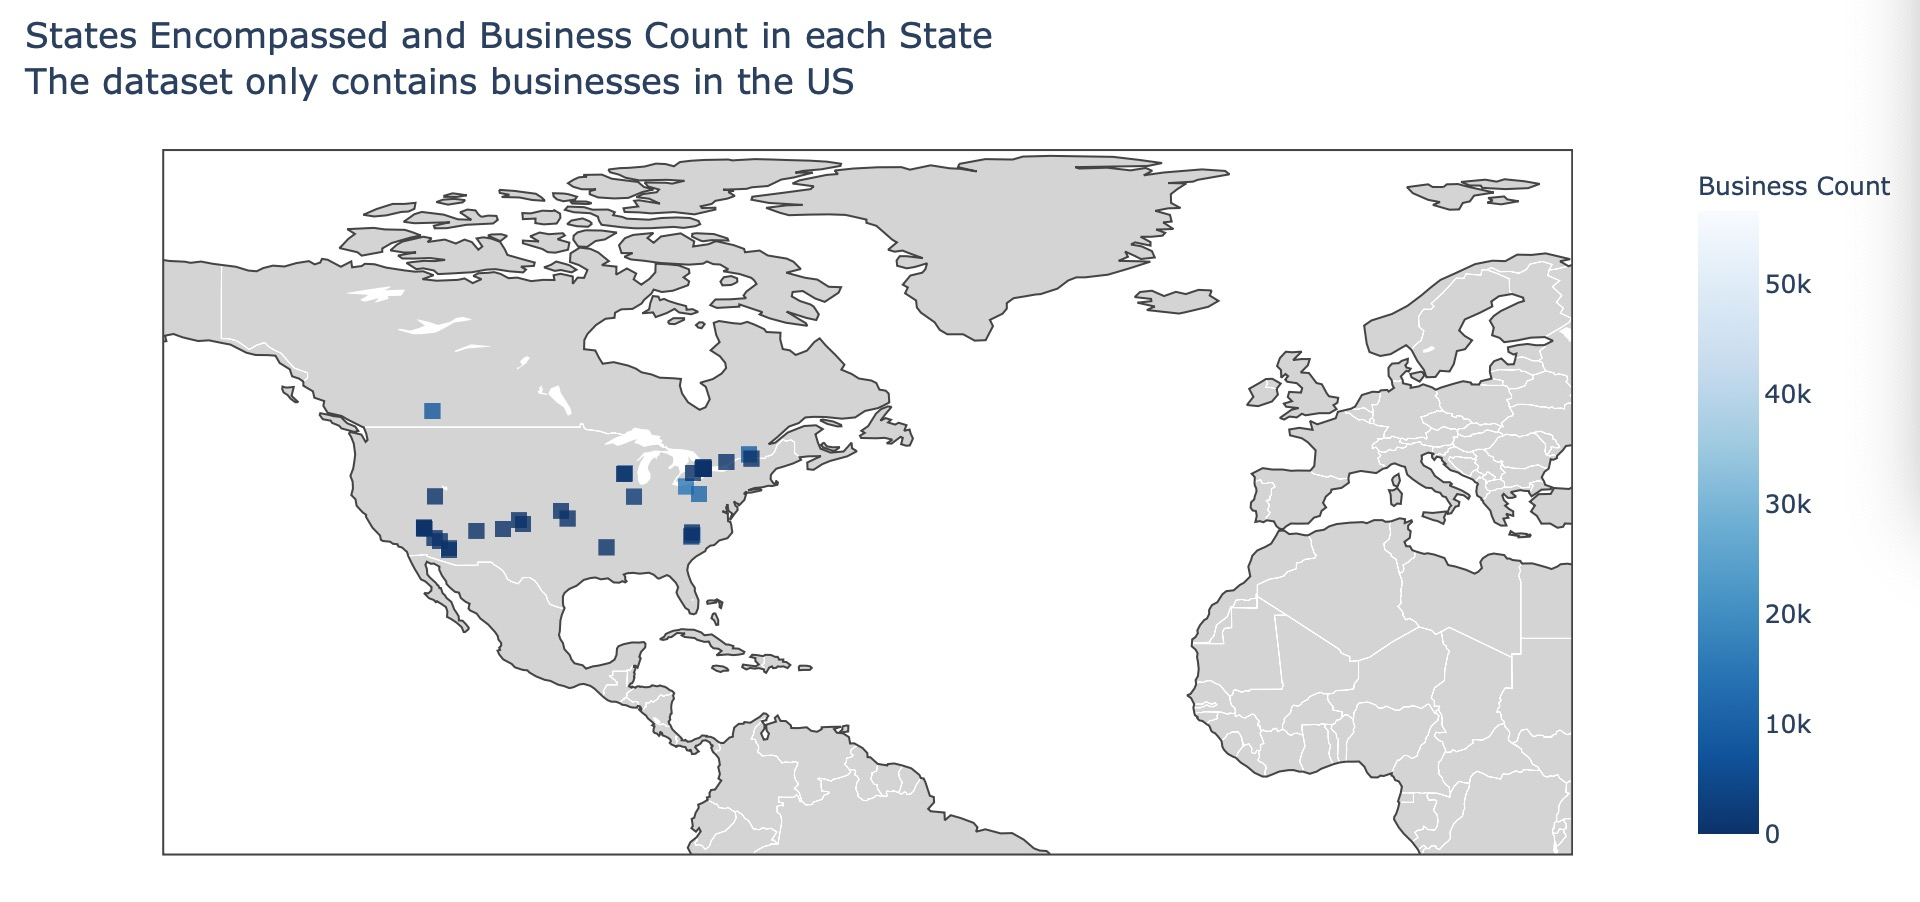

In [1]:
from IPython.display import Image
Image(filename='Map1.jpeg') 

The map indicates that all the states that have records of Yelp Review are in North America. In the barplot below, ranked the states by the number of businesses reviewed in the state and display 25 states. One important thing we noticed is that there are several regions that are in Europe. For example, "XGM" refers to the Great Manchester Metropolitan counties in the United Kingdom, and "XWY" refers to the West Yorkshire. Contradictory, our map above indicates that there are no business recorded in Europe. This suggest that there might be some data collection error for the geographic coordinates of the businesses.

Another point we can see from the map is that there is an uneven distribution of the number of businesses that have been reviewed in each states. There are some states that are channeled with low luminance, which have a significantly higher number of businesses that have been reviewed. We are able to see the uneven distribution more clearly in the bar plot below. 

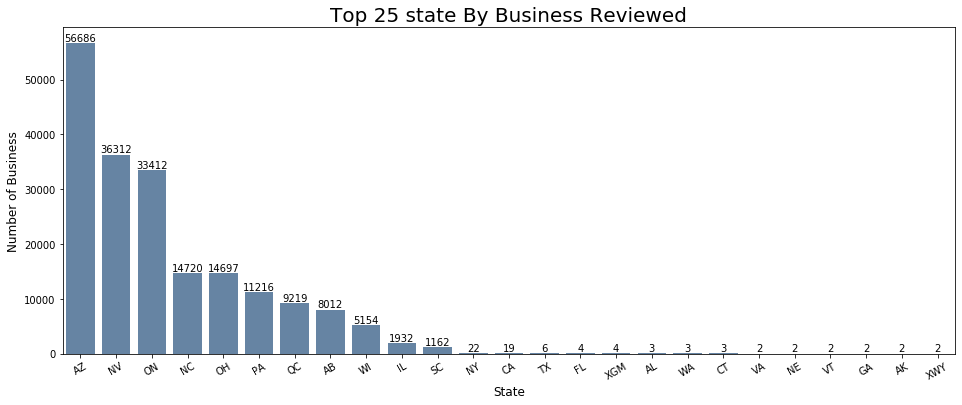

In [12]:
x = state_df.state.value_counts()
x = x.sort_values(ascending=False)
x = x.iloc[0:25]
plt.figure(figsize=(16,6))
ax = sns.barplot(x.index, x.values, alpha=0.8, color=(0.2, 0.4, 0.6, 0.6))
plt.title("Top 25 state By Business Reviewed", fontsize = 20)
locs, labels = plt.xticks()
plt.setp(labels, rotation=30)
plt.ylabel('Number of Business', fontsize=12)
plt.xlabel('State', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

We can conclude that this dataset encompass cities that are in the North America and Europe. The histogram above further indicates that there is an uneven distribution of the number of businesses that have been reviewed in each states. We see that Arizona, Nevada, and Ontario has a significantly higher number of business reviewed compare to other states. We will investigate further which cities this dataset encompass in those states. 

We know the fact that the postal abbreviations for US and Canadian states only have two letters. Since only the geographic coordinates of the regions in the North America are correct, we will drop the states that have more than two letters when we are investigating which cities does this dataset emcompass.

In [13]:
city_df = yelp_business[yelp_business['state'].str.len() == 2]
city_df = city_df.reset_index(drop = True)

Similarly, to visualize the cities that are encompassed in the dataset, we need to make the geographic coordinate of each city unified. We will accomplish this by taking the mean of each latitude and longitude of the businesses in the city.

In [14]:
city_dict = {}
for index, row in city_df.iterrows():
    if row['city'] in city_dict:
        city_dict[row['city']][0].append(row['latitude'])
        city_dict[row['city']][1].append(row['longitude'])
    else:
        city_dict[row['city']] = ([row['latitude']], [row['longitude']])

In [15]:
from statistics import mean
for key, value in city_dict.items():
    city_dict[key] = (mean(value[0]), mean(value[1]))

In [16]:
for key, value in city_dict.items():
    city_df.loc[city_df.city == key, 'latitude'] = value[0]
    city_df.loc[city_df.city == key, 'longitude'] = value[1]

As we have successfully unified the geographic coordinate of each city, we will take a peak of the North America view of Yelp businesses in the city granular level. I also want to have a peak of the number of business that have been reviewed on Yelp in each cities. Hence we will add a count column in the dataframe before creating the map. 

In [17]:
# Add a 'count' column to the dataframe that counts the number of unique business in the city. 
city_df['count'] = city_df.groupby('city')['city'].transform('count')

In [18]:
temp_city_df = city_df.copy().drop_duplicates(subset = "city")

In [4]:
# fig = go.Figure(data=go.Scattergeo(
#         lon = temp_city_df['longitude'],
#         lat = temp_city_df['latitude'],
#         text = temp_city_df['city'],
#         mode = 'markers',
#         marker = dict(
#             size = 8,
#             opacity = 0.8,
#             reversescale = True,
#             autocolorscale = False,
#             symbol = 'square',
#             line = dict(
#                 width=0.001,
#                 color='rgba(102, 102, 102)'
#             ),
#             colorscale = 'Blues',
#             cmin = 0,
#             color = temp_city_df['count'],
#             cmax = temp_city_df['count'].max(),
#             colorbar_title="Business Count"
#         )))

# fig.update_layout(
#         title = 'City Emcompassed and Business Count in each City <br> \
#         Cities are grouped near Metropolitan Areas',
#         geo = dict(
#             scope='north america',
#             landcolor = "rgb(212, 212, 212)",
#             subunitcolor = "rgb(255, 255, 255)",
#             countrycolor = "rgb(255, 255, 255)",
#             showlakes = True,
#             lakecolor = "rgb(255, 255, 255)",
#             showsubunits = True,
#             showcountries = True,
#             showland = True,
#             countrywidth = 0.5,
#             subunitwidth = 0.5,
#         lonaxis = dict(
#             showgrid = True,
#             gridwidth = 0.5,
#             range= [ -140.0, -55.0 ],
#             dtick = 5
#         ),
#         lataxis = dict (
#             showgrid = True,
#             gridwidth = 0.5,
#             range= [ 20.0, 60.0 ],
#             dtick = 5
#         )
#         ),
#     )
# fig.show()

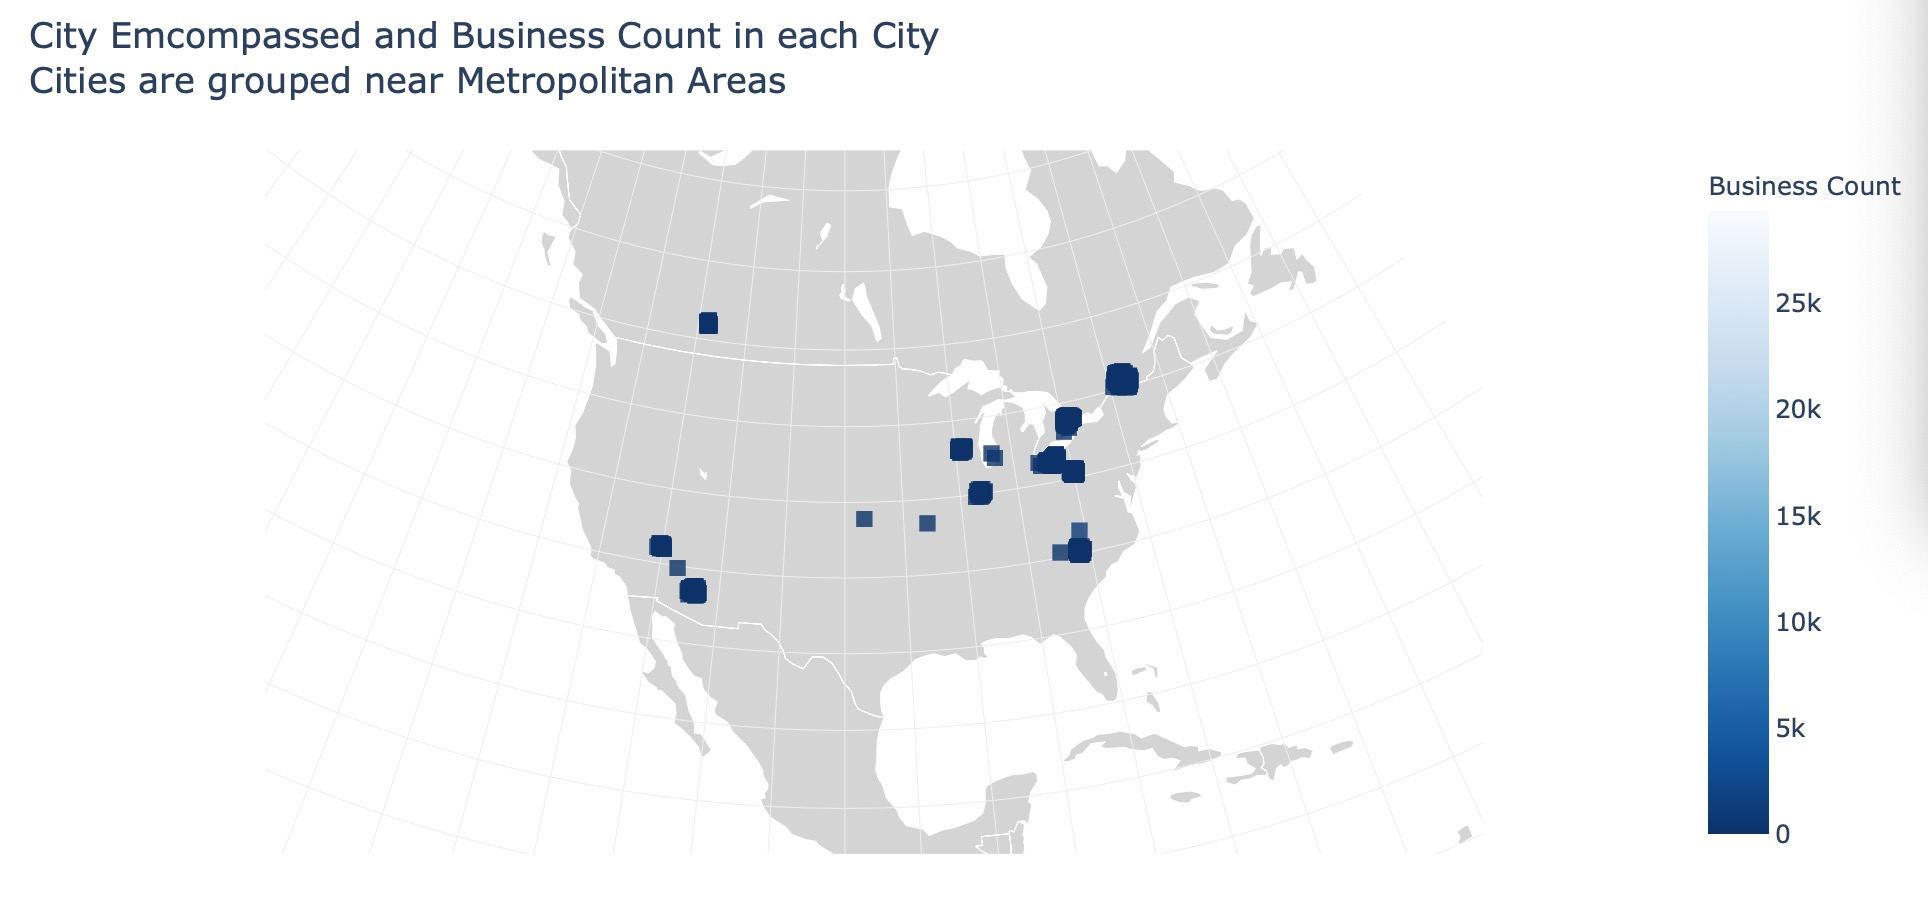

In [3]:
from IPython.display import Image
Image(filename='Map2.jpeg') 

From the map above, I noticed that the majority of the cities are grouped together, specifically to some metropolitan areas, such as Toronto, Charlotte, Las Vegas, Montreal, etc. I will group the business into their metropolitan areas by their longitude and latitude, or by province if the business is in Canada. 

In [20]:
metropolitan_CA = [("AB", "Calgary"), ("ON", "Toronto"), ("QC", "Montréal")]
metropolitan_US = ["Las Vegas", "Phoenix", "Madison", "Champaign", "Cleveland", 
                  "Pittsburgh", "Charlotte"]

In [21]:
city_df['metropolitan'] = np.nan
for met_ca in metropolitan_CA:
    city_df.loc[city_df['state'] == met_ca[0], "metropolitan"] = met_ca[1]

In [22]:
for met_US in metropolitan_US:
    lat = city_df.loc[city_df['city'] == met_US, 'latitude'].values[0]
    long = city_df.loc[city_df['city'] == met_US, 'longitude'].values[0]
    city_df.loc[city_df['latitude'].between(lat - 1.3, lat + 1.3) 
                & city_df['longitude'].between(long - 1.3, long + 1.3), 
                "metropolitan"] = met_US

In [23]:
# Add a 'count' column to the dataframe that counts the number of unique business in the metropolitan. 
city_df['count'] = city_df.groupby('metropolitan')['metropolitan'].transform('count')

In [24]:
temp_metropolitan_df = city_df.copy().drop_duplicates(subset = "metropolitan").dropna(subset = ['metropolitan'])

In [6]:
# fig = go.Figure(data=go.Scattergeo(
#         lon = temp_metropolitan_df['longitude'],
#         lat = temp_metropolitan_df['latitude'],
#         text = temp_metropolitan_df['metropolitan'],
#         mode = 'markers+text',
#         textposition = "middle right",
#         textfont = {"size": 8},
#         marker = dict(
#             size = temp_metropolitan_df['count']/100,
#             opacity = 0.8,
#             reversescale = True,
#             autocolorscale = False,
#             sizemode = 'area',
#             line = dict(
#                 width=0.001,
#                 color='rgba(102, 102, 102)'
#             ),
#             colorscale = 'Blues',
#             cmin = 0,
#             color = temp_metropolitan_df['count'],
#             cmax = temp_metropolitan_df['count'].max(),
#             colorbar_title="Business Count"
#         )))

# fig.update_layout(
#         title = 'Metropolitan Emcompassed and Business Count in each City <br> \
#         Cities are grouped near Metropolitan Areas',
#         geo = dict(
#             scope='north america',
#             landcolor = "rgb(212, 212, 212)",
#             subunitcolor = "rgb(255, 255, 255)",
#             countrycolor = "rgb(255, 255, 255)",
#             showlakes = True,
#             lakecolor = "rgb(255, 255, 255)",
#             showsubunits = True,
#             showcountries = True,
#             showland = True,
#             countrywidth = 0.5,
#             subunitwidth = 0.5,
#         lonaxis = dict(
#             showgrid = True,
#             gridwidth = 0.5,
#             range= [ -140.0, -55.0 ],
#             dtick = 5
#         ),
#         lataxis = dict (
#             showgrid = True,
#             gridwidth = 0.5,
#             range= [ 20.0, 60.0 ],
#             dtick = 5
#         )
#         ),
#     )
# fig.show()

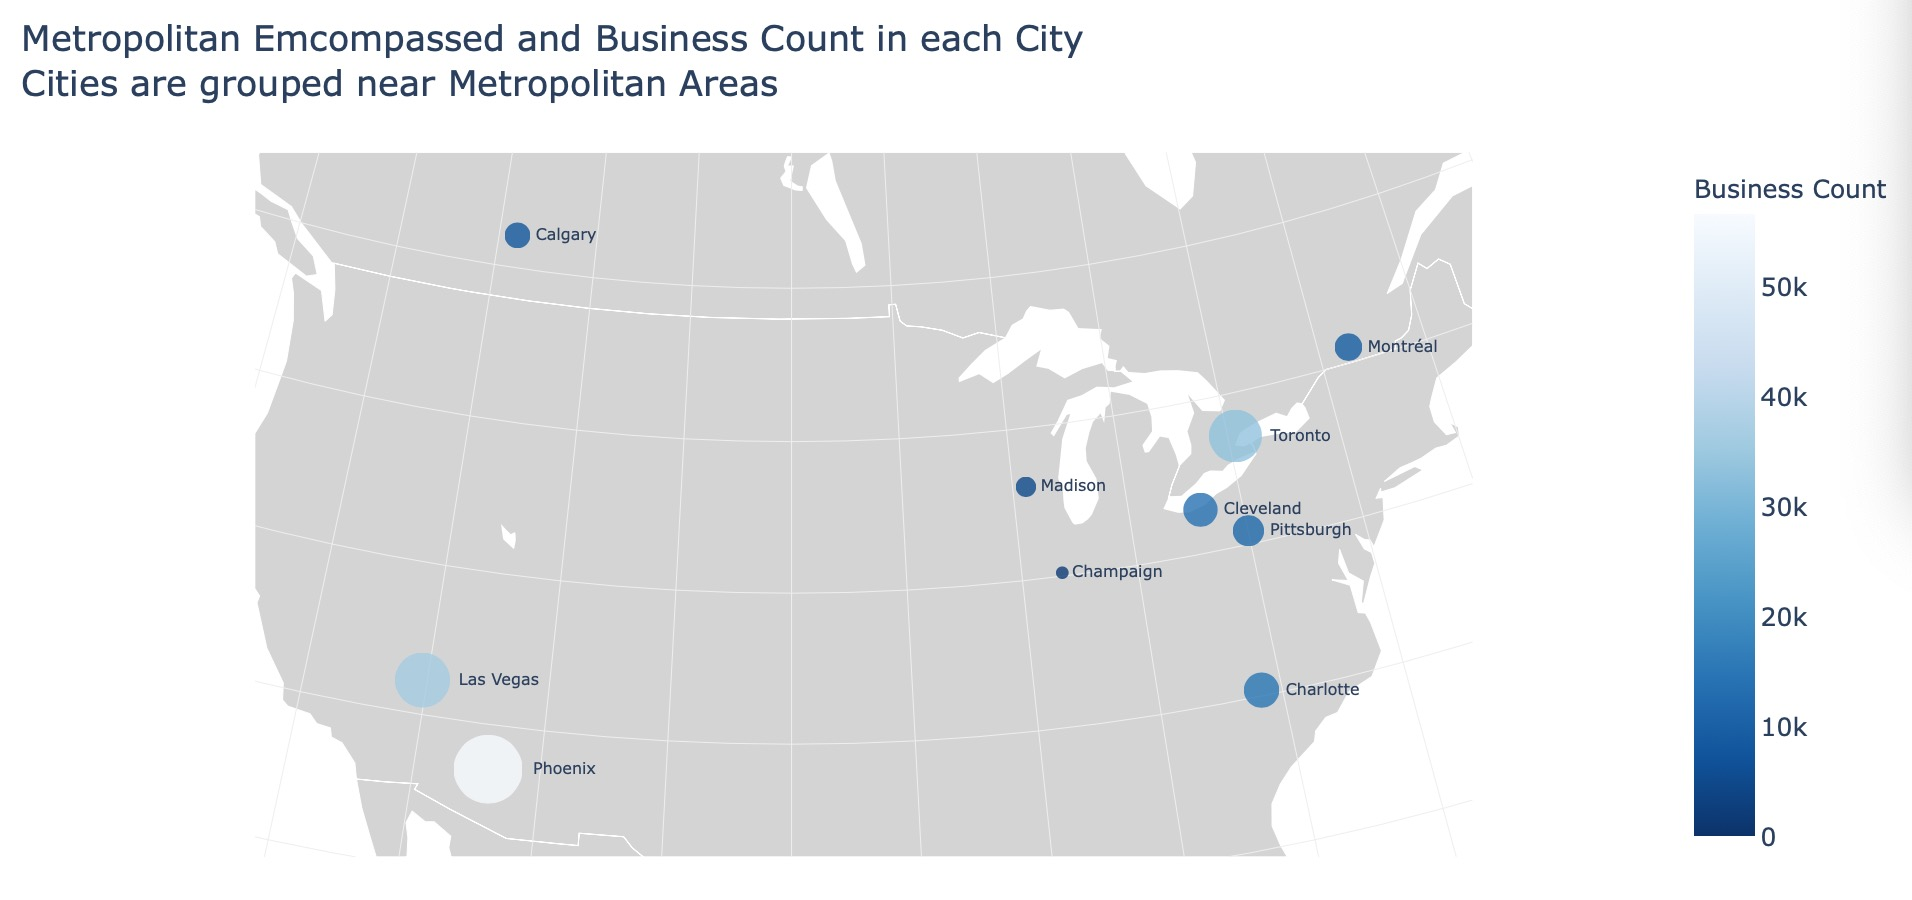

In [5]:
from IPython.display import Image
Image(filename='Map3.jpeg') 

In the map above, I have group the businesses into their metropolitan areas by their geographic coordinates, and plot the number of business in each metropolitan area. The lighter the color and the larger the circle is, indicates the more the number of business is. We see that Phoenix has the largest number of businesses, following by Toronto and Las Vegas.

To conclude, the dataset encompasses cities mainly in the U.S. and Canada. The cities are in grouped in several metropolitan areas as indicated above, and the majority of the businesses are in Phoenix, Las Vegas, and Toronto.

### 3.2. What are the most frequent business categories overall?

In this section, we are interested in finding the most frequent business categories overall. Our dataset contains the variable "categories", which recognizes which categories does the business belong to. Note that a business can have multiple categories. We will first visualize the frequent categories by a bar plot.

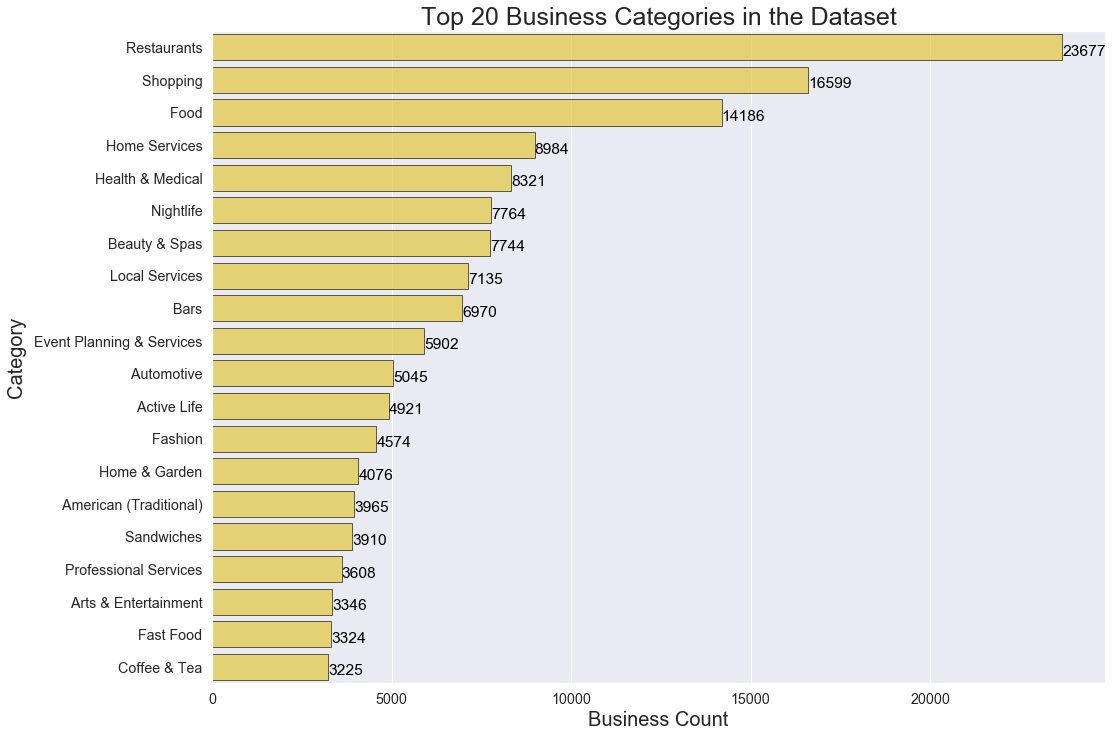

In [26]:
sns.set(font_scale=1.3);
business_cats = ' '.join(yelp_business['categories'].dropna())

cats = pd.DataFrame(business_cats.split(','),columns=['category'])
cat_val_count = cats.category.value_counts()

cat_val_count = cat_val_count.sort_values(ascending=False)
x = cat_val_count.iloc[0:20]

fig, ax = plt.subplots(figsize=(16,12))
ax = sns.barplot(x.values, x.index, alpha=0.6, color="gold", edgecolor="black");
for i, v in enumerate(x.values):
    ax.text(v + 3, i + 0.25, str(v), color='black')
plt.title("Top 20 Business Categories in the Dataset",fontsize=25);
plt.ylabel('Category', fontsize=20);
plt.xlabel('Business Count', fontsize=20);

The bar plot, our initial observation, indicates that there are a huge variety of categories that are frequent. Food related categories, shopping related categories, and service related categories are all have a high frequency. However, I noticed that one category might be a subcategory of the other. For example, the category "Fast Food" might be a subset of the the category "Restaurants". After doing some research on the [Yelp Category List](https://www.yelp.com/developers/documentation/v3/category_list), I noticed that the categories are managed in tree-based. In other word, there exists some collinear relationship between the subcategories and its parent category. Hence, I will be investigating the number of businesses for each root categories. 

We will be able to obtain all the categories currently recognized on Yelp by the [Fusion API](https://www.yelp.com/developers/documentation/v3/all_category_list/).

In [27]:
from urllib.request import urlopen

In [28]:
with urlopen("https://www.yelp.com/developers/documentation/v3/all_category_list/categories.json") as url:
    categories = json.loads(url.read().decode())

In [29]:
# This will be used to create our category dataframe, which tells us about each categories parent, title, and depth
cats_dict = {}
for cat in categories:
    cats_dict[cat['alias']] = {'parents': cat['parents'], 'category': cat['title'], 'level': -1}

In [30]:
def update_level(cat):
    """
    This function wil update the level of depth of the category recursively
    """
    level = 0
    if cats_dict[cat]['parents']:
        level = update_level(cats_dict[cat]['parents'][0]) + 1
    return level
        

In [31]:
for cat, value in cats_dict.items():
    value['level'] = update_level(cat)

In [32]:
# convert the category dict into a dataframe
category_df = {'category': [], 'parent': [], 'level': []}
for key, value in cats_dict.items():
    category_df['category'].append(value['category'])
    category_df['level'].append(value['level'])
    category_df['parent'].append(value['parents'])
category_df = pd.DataFrame(category_df)

In [33]:
# Extract the root categories
root_lst = category_df[category_df['level'] == 0]['category'].tolist()

In [34]:
cat_val_count.index = cat_val_count.index.str.strip()
root_cat_val_count = cat_val_count[cat_val_count.index.isin(root_lst)]

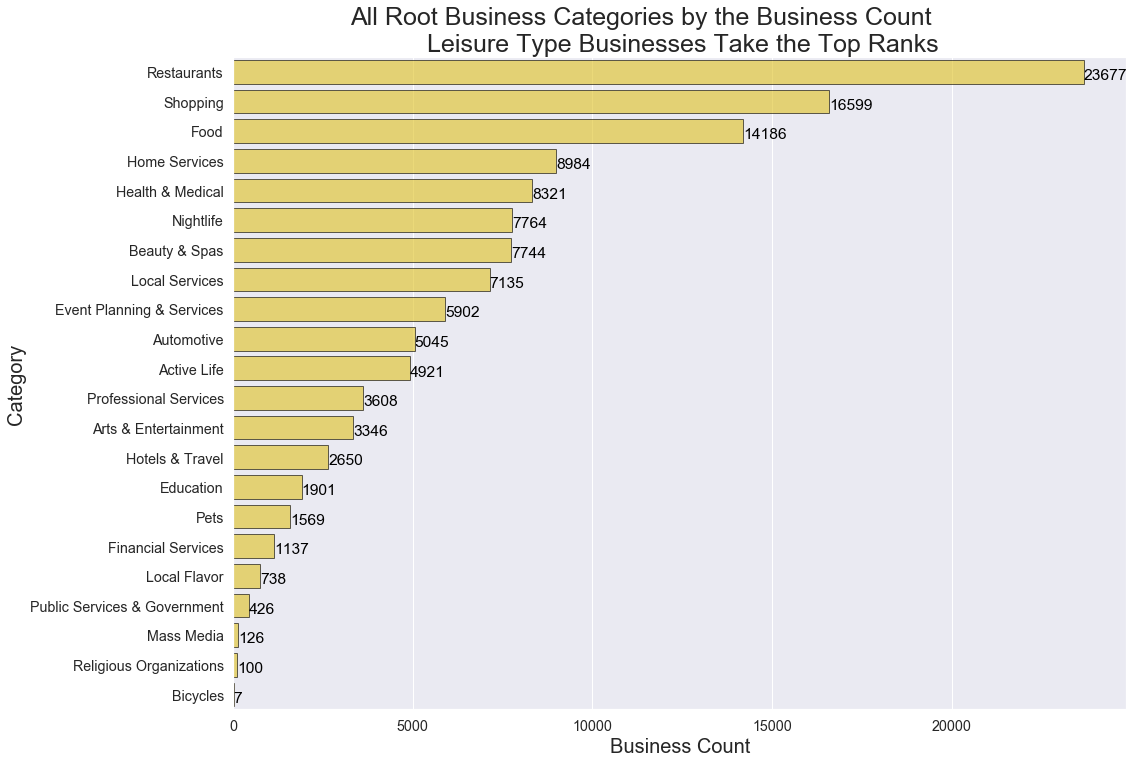

In [35]:
# Plot the distribution of business count by root categories
fig, ax = plt.subplots(figsize=(16,12))
ax = sns.barplot(root_cat_val_count.values, root_cat_val_count.index, alpha=0.6, color="gold", edgecolor="black");
for i, v in enumerate(root_cat_val_count.values):
    ax.text(v + 3, i + 0.25, str(v), color='black')
plt.title("All Root Business Categories by the Business Count \
          \n Leisure Type Businesses Take the Top Ranks",fontsize=25);
plt.ylabel('Category', fontsize=20);
plt.xlabel('Business Count', fontsize=20);

We have displayed number of businesses of the root categories in the dataset. Comparing with the previous bar plot, we can see that we have successfully removed the subcategories such as "bar", "fast food", etc. As the result, we have obtained an accurate distribution of the number of businesses among different categories. Leisure related businesses tend to be more frequent, following by service related businesses. "Restaurants" and "food" are two of the most frequent category, suggesting that people generally like to post their dining experiences.

Since restaurant is the most frequent category, I want to investigate on what kind of subcategory of restaurants have the most number of businesses. 

In [36]:
res_cat = category_df.loc[["restaurants" in cat for cat in category_df['parent']]]

In [37]:
# Extract the subcategories of "Restaurant"
rest_sub_lst = res_cat['category'].tolist()

In [38]:
rest_sub_val_count = cat_val_count[cat_val_count.index.isin(rest_sub_lst)]

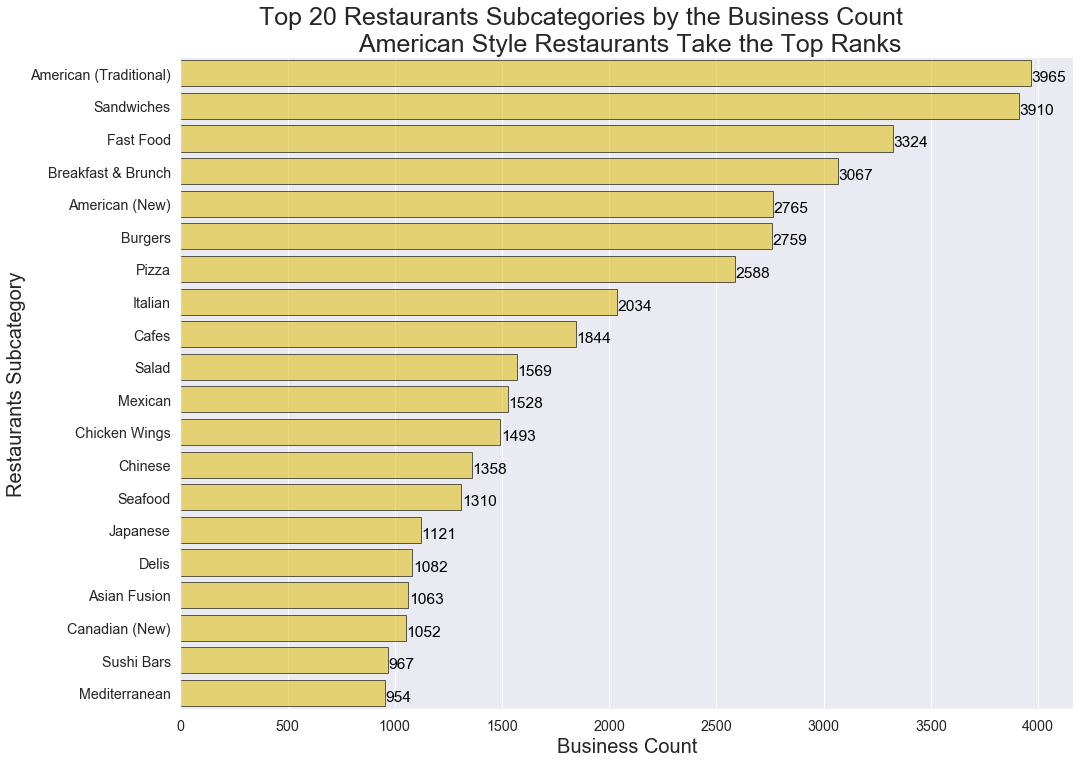

In [39]:
# Plot the most frequent business categories overall
x = rest_sub_val_count.iloc[0:20]
fig, ax = plt.subplots(figsize=(16,12))
ax = sns.barplot(x.values, x.index, alpha=0.6, color="gold", edgecolor="black");
for i, v in enumerate(x.values):
    ax.text(v + 3, i + 0.25, str(v), color='black')
plt.title("Top 20 Restaurants Subcategories by the Business Count \
            \n American Style Restaurants Take the Top Ranks",fontsize=25);
plt.ylabel('Restaurants Subcategory', fontsize=20);
plt.xlabel('Business Count', fontsize=20);

The restaurant categories are divided into different cuisine styles such as Italian, Mexican, Chineses, Japanese, etc. It is also divided into the types of food they serve, such as The sandwitches, burgers, pizza, etc. The barplot indicates that American style food takes all the top places among all the other subcategories of restaurants in terms of the number of businesses. This is expected since as discussed in the previous section, the dataset only emcompasses regions in the North America.

### 3.3. What types of establishments tend to have bike parking?

Noticed that under the "attributes" column in the business dataset, we can obtain information regarding whether the businesses have bike parkings. To define "type of establishment", I am interested in the category of the business. In this research question, I will be investigating which categories business tend to have bike parking. Note that "categories" means the root categories as discussed in the previous section.

We will add a new column "hasBikeParking" to the dataframe, which has value 1 if the business has bike parking, and value 0 if the business does not have bike parking. Note that we consider that the category does not have the "BikeParking" information as 0, i.e. does not have bike parking. 

In [40]:
# iterate through the attributes entries to decided whether the business has bike parking
attributes_df = yelp_business.copy().dropna(subset = ["attributes"], axis = 0)
bikeparking = []
for index, row in attributes_df.iterrows():
    if "BikeParking" in row.attributes:
        if row.attributes['BikeParking'] == 'True':
            bikeparking.append(1)
        else:
            bikeparking.append(0)
    else:
        bikeparking.append(0)

In [41]:
attributes_df['hasBikeParking'] = bikeparking

In [42]:
attributes_df = attributes_df.loc[:, ["categories", "hasBikeParking"]]
attributes_df = attributes_df.dropna().reset_index(drop = True)

In [43]:
# Explode the column "categories" to obtain categories that has bike parking separately. 
attributes_df = pd.concat([pd.Series(row['hasBikeParking'], 
                                  row['categories'].split(','))              
                    for _, row in attributes_df.iterrows()]).reset_index()

In [44]:
# Rename the columns
attributes_df.columns = ['categories', 'hasBikeParking']

As a part of data exploration, we will perform the chi-squared test to determine if having bike parking is dependent on the category of the business. Pearson's Chi-square test can be used to assess a few types of comparison, the only type of comparison we will be using for this reserach is a test of independence asseses whether observations consisting of measures on two variables, expressed in a contigency table, are independent of each other. The null hypothesis of this test is that the occurrence of these outcomes is statistically independent. We will be using this method when investigating if bike parking is independent of the category of the business. As discussed in the previous section, we will only be investigating the question with the root categories.

In [45]:
attributes_df = attributes_df[attributes_df['categories'].isin(root_lst)]

In [46]:
import statsmodels.api as sm
tab = pd.crosstab(attributes_df['categories'], attributes_df['hasBikeParking'])

In [47]:
tab.index = tab.index.str.strip()
root_tab = tab[tab.index.isin(root_lst)]

In [48]:
table = sm.stats.Table(root_tab)

This is the contigency table we will be using to perform the chi-square test. Where we have categories on the different rows and the columns indicates how many businesses in the categories has bike parking or not.

In [204]:
table.table_orig

hasBikeParking,0,1
categories,,
Active Life,1033,1134
Arts & Entertainment,1041,351
Automotive,2433,148
Beauty & Spas,2450,3030
Bicycles,0,1
Education,226,108
Event Planning & Services,1517,448
Financial Services,108,10
Food,3164,4510


In [49]:
rslt = table.test_nominal_association()

In [50]:
print("p-value: ", rslt.pvalue)

p-value:  0.0


The null hypothesis is that having bike parking is independent on the category of the business. We have obtained a p-value of 0.0, which is smaller than the conventionally accepted significance level of 0.05. We have successfully reject the null hypothesis. Hence, having bike parking is dependent on the category of the business. 

For the next step, we are interested in which category of business tend to have bikeparking. The method we will be deciding what types of establishment tend to have bike parking is to compare the ratio below:

\begin{equation*}
\frac{bike\ parking\ counts\ of\ the\ business\ category}{total\ bike\ parking\ counts}\div
\frac{without\ bike\ parking\ counts\ of\ the\ business\ category}{total\ without\ bike\ parking\ counts}
\end{equation*}

I will call the former fraction as the "Parking Percentage", the later fraction as the "No Parking Percentage", and the final ratio as the "Parking Ratio".

The former fraction is the ratio between the number of bike parkings that the category has to the total number of bike parkings among all the categories. 

The later fraction is the ratio between the number of no bike parkings that the catetory has to the total number of no bike parkings among all the categories.

I have chosen this algorithm because if we simply take the ratio between the number of bike parkings of the category to the number of no bike parkings of the category, we came to the issue that the total number of the bike parkings and no bike parkings are different, hence they should be weighted differently.  

We will construct a dataframe that has the variables mentioned above.

In [51]:
df = pd.DataFrame(columns = ["Category", "Parking Percentage", 
                            "No Parking Percentage", "Parking Ratio"])

In [52]:
category = []
category = list(attributes_df["categories"].copy().drop_duplicates())

In [53]:
total_parking = attributes_df.hasBikeParking.sum()
parking_percentage = []
for cat in category:
    cat_parking = attributes_df[attributes_df["categories"] == cat].hasBikeParking.sum()
    parking_percentage.append(cat_parking/total_parking)

In [54]:
total_no_parking = len(attributes_df.hasBikeParking) - attributes_df.hasBikeParking.sum()
no_parking_percentage = []
for cat in category:
    cat_parking = attributes_df[attributes_df["categories"] == cat].hasBikeParking.sum()
    total_rows = len(attributes_df[attributes_df["categories"] == cat].hasBikeParking)
    cat_no_parking = total_rows - cat_parking
    no_parking_percentage.append(cat_no_parking/total_no_parking)

In [55]:
df["Category"] = category
df["Parking Percentage"] = parking_percentage
df["No Parking Percentage"] = no_parking_percentage

I noticed the fact that the category "Bycicles" always have bike parking, which is reasonable. Therefore, its no parking percentage is 0 and hence we cannot obtain the "Parking Ratio".

In [56]:
df[df['No Parking Percentage'] == 0].head()

,Category,Parking Percentage,No Parking Percentage,Parking Ratio
21,Bicycles,0.000041,0.0,NaN


As we exluded the category "Bicycles", we will now calculate the "Parking Ratio" of each category.

In [57]:
df = df[df['No Parking Percentage'] != 0]
df["Parking Ratio"] = df.apply(lambda row :row["Parking Percentage"]/row["No Parking Percentage"], axis = 1)

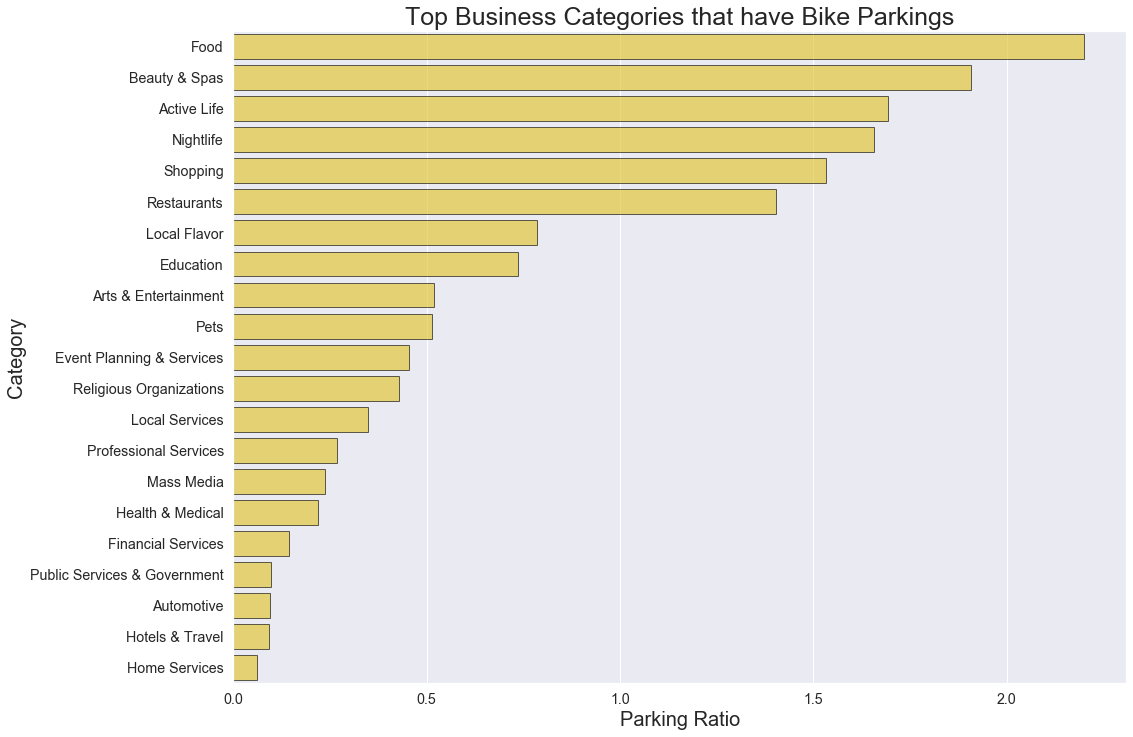

In [58]:
sns.set(font_scale=1.3);
x = df.sort_values(by = ['Parking Ratio'], ascending=False)

fig, ax = plt.subplots(figsize=(16,12))
ax = sns.barplot(x['Parking Ratio'], x['Category'], alpha=0.6, color="gold", edgecolor="black");
plt.title("Top Business Categories that have Bike Parkings",fontsize=25);
plt.ylabel('Category', fontsize=20);
plt.xlabel('Parking Ratio', fontsize=20);

Observing the bar plot above, we see that top categories in terms of the parking ratio are mainly leisure related categories. I was expecting "Active Life" to have the highest parking ratio since it is more sport related; however, it is not. Further research may look at whether there is a relationship between geographic region of the business and the parking ratio, since businesses with the "Active Life" category might be located in places that are difficult to offer bike parking. Moreover, we noticed service related businesses tend to not offer bike parking. 

### 3.4. An article recently claimed that having more yelp reviews lead to a higher rating, and hence increased sales. Do the data support this claim?

The motivation of this study intuitive. If businesses that have more number of reviews tend to have a higher rating, the demand should increase since consumers are more willing to pay better quality products , and hence, increases the business’ revenue. In the research question, given data of the number of yelp reviews and rating of each business, we are interested in whether more yelp reviews lead to a higher rating. 

We will first perform some data exploration on the two variables: the rating stars of the business and the number of reviews of the business.

In [59]:
rate_review_df = yelp_business.dropna(subset = ["stars", "review_count"])

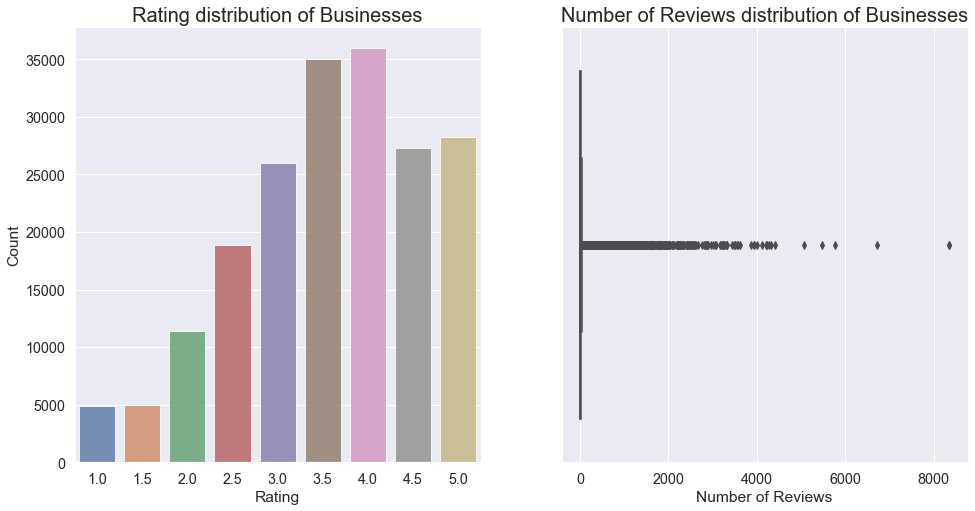

In [60]:
review_series = rate_review_df.stars.value_counts()
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
sns.barplot(review_series.index, review_series.values, alpha=0.8, palette="deep", ax = axes[0])
axes[0].set(title = "Rating distribution of Businesses", ylabel = 'Count', xlabel = 'Rating')
axes[0].title.set_fontsize(20)
sns.boxplot(rate_review_df["review_count"], ax = axes[1])
axes[1].set(title = "Number of Reviews distribution of Businesses", xlabel = 'Number of Reviews')
axes[1].title.set_fontsize(20)

There are some few observations we can make from the graphs above. The bar plot on the left shows the rating distribution of businesses that have been reviewed on Yelp. The plot indicates that rating is a categorical variable that has a value range between 1.0 and 5.0. Moreoever, most of the business have a rating of 3.5 or 4.0. The distplot on the right shows that number of reviews distribution of businesses that have been reviewed. The plot indicates that number of reviews is a continous variable. Furthermore, the plot shows that the majority of the business has a significantly low number of review. We will drop those business when determining the relationship between number of reviews and rating because a low number of reviews is not reliable to reflect the true rating of the business. 

30 is a large enough sample size to estimate the true rating. We will drop the businesses that have the number of reviews less than 30. 

In [61]:
rate_review_df = rate_review_df[rate_review_df['review_count'] >= 30]

The first exploratory visualization we have is a linear regression model fit plot with the discrete variable rating showing means and 95 percent confidence intervals of the review count. The linear regression line has a positive slope, indicating that we should expect a positive relationship between rating and review count. Each point on the graph is the resulting estimates of the mean of review count, where estimates is bootstrapped and a 95% confidence interval is indicated by the vertical lines. Noticed that there is a strictly increase of the estimated mean of review count only between rating 2.0 and 4.0, and the size of the confidence interval is relatively smaller as well. Therefore, I would like to investigate more rigorously on the relationship between Rating and Review Count, but limiting the range of rating between 2.0 and 4.0. Noticed that the 95-CI of the mean review count for rating 2.5 and 3.0 has overlaps, we will investigate this further.

We will be performing the Analysis of Variance (ANOVA) test to investigate if there is a significant difference between the mean of the Review Count in the different Ratings. As discussed above, we will only be analyzing rating between 2.0 and 4.0. 

In [62]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [63]:
rate_review_df = rate_review_df[rate_review_df.stars >= 2.0]
rate_review_df = rate_review_df[rate_review_df.stars <= 4.0]

In [64]:
results = ols('review_count ~ C(stars)', 
              data = rate_review_df).fit()

In [65]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_count   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     128.0
Date:                Mon, 02 Mar 2020   Prob (F-statistic):          1.32e-108
Time:                        12:16:27   Log-Likelihood:            -2.1680e+05
No. Observations:               31882   AIC:                         4.336e+05
Df Residuals:                   31877   BIC:                         4.337e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          67.0460      6.064     11.056      0.000      55.160      78.932
C(stars)[T.2.5]    20.9775      7.268      2.886      0.004       6.732      35.223
C(stars)[T.3.0]    31.8436      6.670      4.774      0.000      18.771      44.916
C(stars)[T.3.5]    50.8867      6.438      7.904      0.000      38.268      63.505
C(stars)[T.4.0]    89.3448      6.396     13.969      0.000      76.808     101.881
==============================================================================
Omnibus:                    54764.138   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         89789761.032
Skew:                          11.808   Prob(JB):                         0.00
Kurtosis:                     261.909   Cond. No.                         12.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Coming from the ANOVA framework, the information we are interested in is the F-statistic and it's corresponding p-value. We have obtained the result of F-statistic = 128.0 and p-value (Prob (F-statistic)) = 1.32e-108. This indicates that there is a significant difference in group means. The coefficients (coef) tells us about the difference in mean between the control group (Rating = 2.0) and the respective group listed (rating between 2.5 and 4.0). Looking at the corresponding p-values of each coefficients, we can see the difference between the rating = 2.0 group and other groups are significant. Note that a high F-statistic implies the variability between group means is much larger than within the group, and hence easier to reject the null hypothesis. From ANOVA analysis, we know that rating differences are statistically significant, but ANOVA does not tell which ratings are significantly different from each other. 

In [66]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(rate_review_df['review_count'], 
                     rate_review_df['stars'])
mc_results = mc.tukeyhsd()
print(mc_results)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper   reject
-----------------------------------------------------
   2.0    2.5  20.9775 0.0319  1.1517  40.8033   True
   2.0    3.0  31.8436  0.001 13.6497  50.0374   True
   2.0    3.5  50.8867  0.001 33.3245  68.4489   True
   2.0    4.0  89.3448  0.001 71.8969 106.7928   True
   2.5    3.0  10.8661 0.1689 -2.4286  24.1607  False
   2.5    3.5  29.9092  0.001 17.4929  42.3254   True
   2.5    4.0  68.3673  0.001 56.1132  80.6214   True
   3.0    3.5  19.0431  0.001  9.4454  28.6409   True
   3.0    4.0  57.5013  0.001 48.1142  66.8883   True
   3.5    4.0  38.4582  0.001 30.3629  46.5534   True
-----------------------------------------------------


The Post-hoc comparison analysis using Tukey HSD test tells us about pairwise comparisons for ratings. The result we obtained is that except 2.5 and 3.0 (which has a p-value of 0.1689), all other pairs of ratings rejects the null hypothesis and indicates significant differences. Recall that in the linear regression line fit plot above, the 95-CI of the mean review count for rating 2.5 and 3.0 has overlaps. These findings suggest that the difference of mean of the review count between rating 2.5 and 3.0 is not significant. Further research may look at the relationship between rating and the demand of the business. 

<br/> <br/>

***

##  IV. GTA Businesses

In the previous section, we have investigated all the businesses that have been reviewed on Yelp. In this section, we will be using the same business dataset to investigate businesses specifically in the Greater Toronto Area (GTA). The research questions we are interested in are:

1. What are the most frequent business categories?
2. What are the top franchises in the city?
3. Does business location play an important role in reviews?
4. Is it true that for every Tim Hortons in the GTA there is a Starbucks nearby? 

We will need create a new dataframe containing businesses in the GTA. I have obtain all the GTA postal code from the website [GTAFlyers](http://gtaflyers.com/gta-postal-codes.html) and hardcoded in an excel file. I will extract businesses that are in the GTA area by its postal code.

In [67]:
gta = pd.read_excel("GTA.xlsx")

In [68]:
gta_lst = gta.GTA.values.tolist()

In [69]:
gta_business_df = yelp_business[yelp_business["state"] == "ON"].dropna(subset = ["postal_code"])

In [70]:
# Split the postal code into two columns by its first three letters and last three letters
gta_business_df[['first_half', 'second_half']] = gta_business_df.postal_code.str.split(expand = True)

In [71]:
gta_business_df = gta_business_df[gta_business_df['first_half'].isin(gta_lst)]

As we have finished extracting cities that are in the GTA area, I decided the explore the dataset by choosing the top cities by business review count in GTA Area. The result is expected. The largest cities, such as Toronto, Mississauga, and Markham in terms of population have the most businesses that have been reviewed on Yelp.

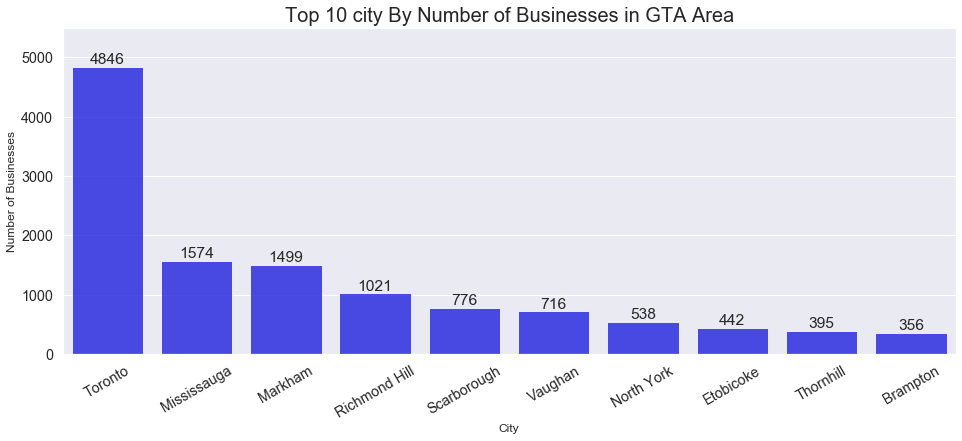

In [72]:
x = gta_business_df.city.value_counts()
x = x.sort_values(ascending=False)
x = x.iloc[0:10]
plt.figure(figsize=(16,6))
ax = sns.barplot(x.index, x.values, alpha=0.8, color = 'blue')
plt.title("Top 10 city By Number of Businesses in GTA Area", fontsize = 20)
locs, labels = plt.xticks()
plt.setp(labels, rotation=30)
plt.ylabel('Number of Businesses', fontsize=12)
plt.xlabel('City', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.ylim((0, 5500))
plt.show()

### 4.1 What are the most frequent business categories? How do they compare against the trends listed in Part 2?

In the previous part, we have analyzed the most frequent business categories all the regions. In this research question, we are interested in the most frequent business categories specifically in the GTA area. As discussed in this previous part, we are only interested in the most frequent root categories.

In [73]:
gta_business_cats = ' '.join(gta_business_df['categories'].dropna())
gta_cats = pd.DataFrame(gta_business_cats.split(','), columns=['category'])
gta_cats_val_count = gta_cats.category.value_counts()

In [74]:
gta_cats_val_count.index = gta_cats_val_count.index.str.strip()
root_cat_val_count = gta_cats_val_count[gta_cats_val_count.index.isin(root_lst)]

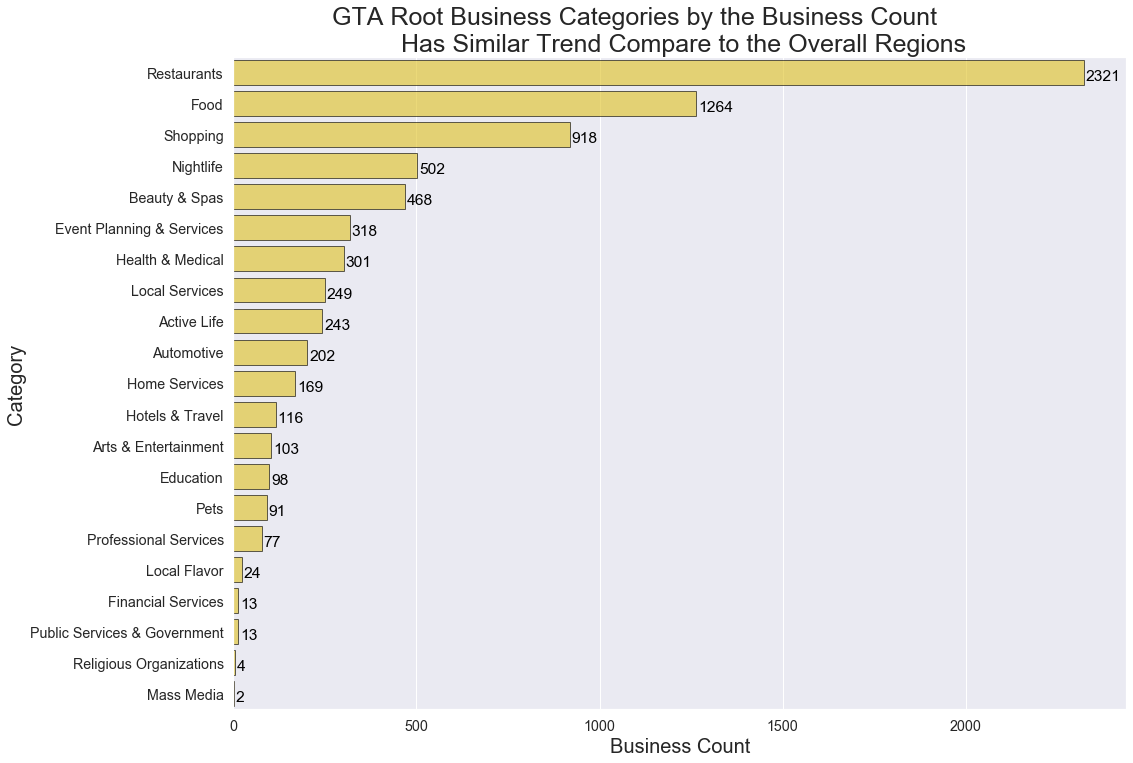

In [75]:
# Plot the distribution of business count by root categories
fig, ax = plt.subplots(figsize=(16,12))
ax = sns.barplot(root_cat_val_count.values, root_cat_val_count.index, alpha=0.6, color="gold", edgecolor="black");
for i, v in enumerate(root_cat_val_count.values):
    ax.text(v + 5, i + 0.25, str(v), color='black')
plt.title("GTA Root Business Categories by the Business Count \
            \n Has Similar Trend Compare to the Overall Regions",fontsize=25);
plt.ylabel('Category', fontsize=20);
plt.xlabel('Business Count', fontsize=20);

By comparing the bar plot above against the trends listed in the previous part, where we discussed about the most frequent business categories all the regions, I have made a few observations:
1. There is generally not a lot of differences between the overal trend. Leisure related businesses still tend to be more frequent, following by service related businesses.
2. "Food" has a higher rank than "Shopping" in the GTA, suggesting that comparing to the overall regions, people tend to enjoy food more than shopping in GTA.
3. GTA Area does not have the category "Bicycles". I found this unexpected since GTA is famous of their Toronto Bikeshare System. One possible reason is that the Toronto Bikeshare is considered as a type of services. 

Since restaurant is also the most frequent category, I want to investigate on what kind of subcategory of restaurants have the most number of businesses in GTA, and compare it with the trends listed in the previous part.

In [76]:
rest_sub_val_count = gta_cats_val_count[gta_cats_val_count.index.isin(rest_sub_lst)]

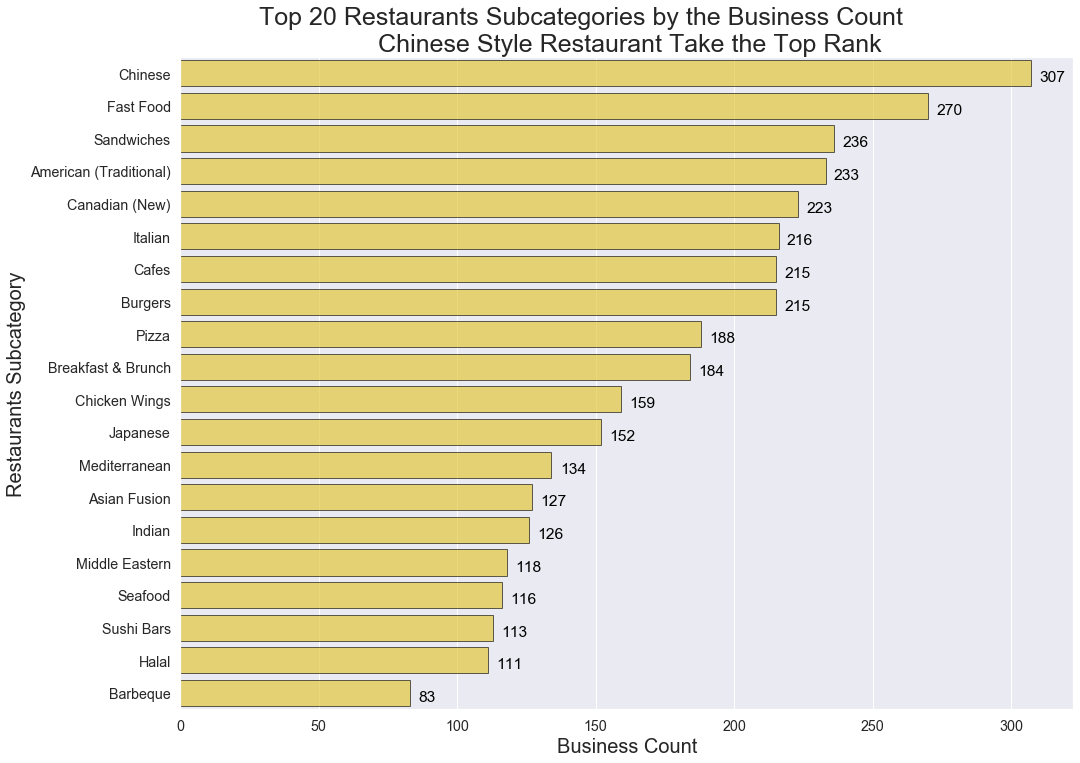

In [77]:
x = rest_sub_val_count.iloc[0:20]
fig, ax = plt.subplots(figsize=(16,12))
ax = sns.barplot(x.values, x.index, alpha=0.6, color="gold", edgecolor="black");
for i, v in enumerate(x.values):
    ax.text(v + 3, i + 0.25, str(v), color='black')
plt.title("Top 20 Restaurants Subcategories by the Business Count \
            \n Chinese Style Restaurant Take the Top Rank",fontsize=25);
plt.ylabel('Restaurants Subcategory', fontsize=20);
plt.xlabel('Business Count', fontsize=20);

Different from the overall trends, Chinese style restaurants have the most frequent business count. We can also see a good variety of cuisines in the top ranks. Canadian, Italian, etc, they all have a solid top ranks, while the overall trends only have strictly American style food at the top ranks. We can also see a more even distribution of business count among different categories of restaurants in the GTA comparing against the overall trend. This suggest that GTA has a diverse food culture, instead of focusing on a specific cuisine.

### 4.2. What are the top franchises in the city?

Franchise is a business opportunity that allows the franchisee to start a business by legally using someone else's expertise, ideas, and processes. We are able to identify franchises if there are multiple businesses with the same name, as the "name" of the business is considered as an intellectual property. 

As a part of data exploration, we will roughly visualize the top franchises by number of businesses in GTA Area. From the bar plot below, we can immediately noticed that there are businesses with different name but are actually belong to the same franchise, that is, for instance, "Tim Hortons" and "Tim Horton's".

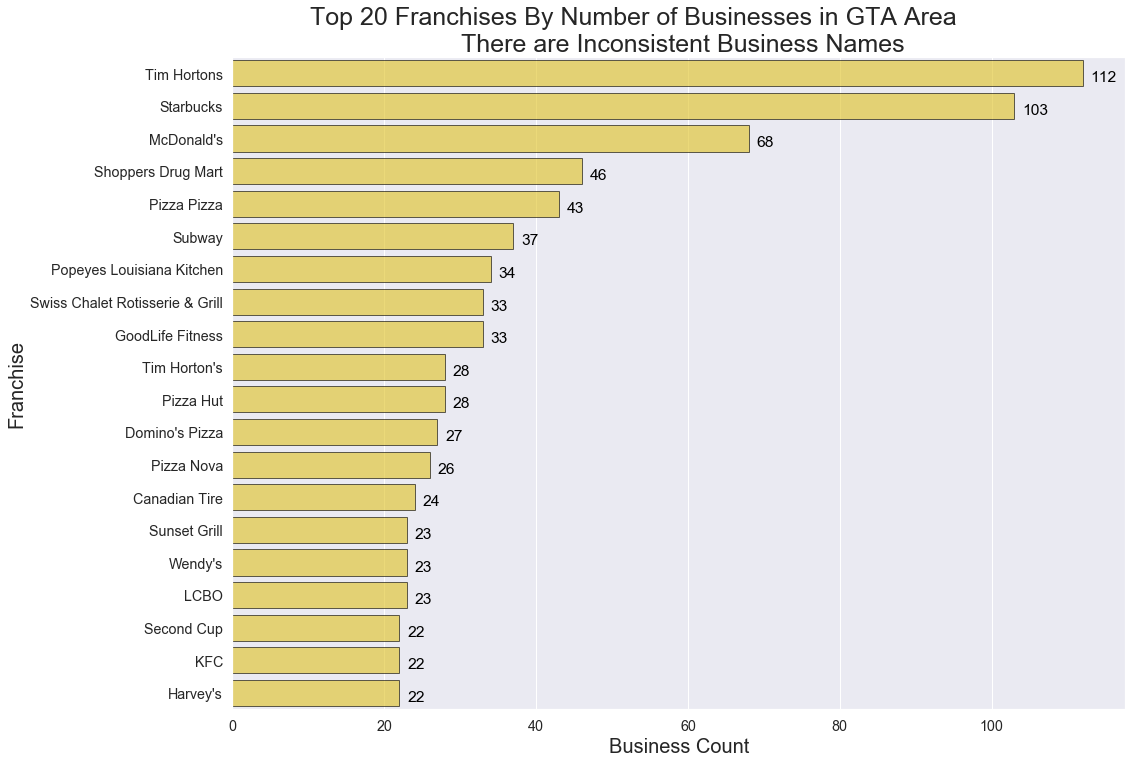

In [78]:
x = gta_business_df.name.value_counts()
x = x.sort_values(ascending=False)
x = x.iloc[0:20]
fig, ax = plt.subplots(figsize=(16,12))
ax = sns.barplot(x.values, x.index, alpha=0.6, color="gold", edgecolor="black");
for i, v in enumerate(x.values):
    ax.text(v + 1, i + 0.25, str(v), color='black')
plt.title("Top 20 Franchises By Number of Businesses in GTA Area \
            \n There are Inconsistent Business Names",fontsize=25);
plt.ylabel('Franchise', fontsize=20);
plt.xlabel('Business Count', fontsize=20);

We will use the FuzzyWuzzy library to match the businesses that have similar names. I choose to find the matching business name by partial ratio because I noticed that there are a lot of business name that are not matched because the location of the business is added in the end. Since partio ratio does not handle lower and upper cases, we will convert all the business name to lower cases when matching. To reduce runtime, I will also remove franchises that have less than than 5 businesses prior matching.

In [79]:
business_count = gta_business_df.name.value_counts()
franchise = business_count[business_count != 1]

In [80]:
franchise_lst = list(franchise.index)

In [81]:
import warnings
warnings.filterwarnings('ignore')

In [82]:
from fuzzywuzzy import fuzz
matched_franchise = []
for f in franchise_lst:
    if len(matched_franchise) == 0:
        matched_franchise.append(f)
    else:
        score = max([fuzz.partial_ratio(f.lower(), matched_f.lower()) for matched_f in matched_franchise])
        if score < 80:
            matched_franchise.append(f)

In [83]:
non_franchise = list(business_count[business_count < 5].index)

In [84]:
gta_franchise_df = gta_business_df[~gta_business_df['name'].isin(non_franchise)]

In [85]:
for index, value in gta_franchise_df['name'].iteritems():
    for benchmark in matched_franchise:
        score = fuzz.partial_ratio(value.lower(), benchmark.lower())
        if score >= 80:
            gta_franchise_df.loc[index, 'name'] = benchmark
            break

As we have finished matching the inconsistent franchise name, we will now define how we consider a franchise "top" in the GTA area. The brand strength of the franchise is one of the important factors to determine whether a franchise is "top". We will investigate the number of business owned by the franchise as an index to determine the brand strength. 

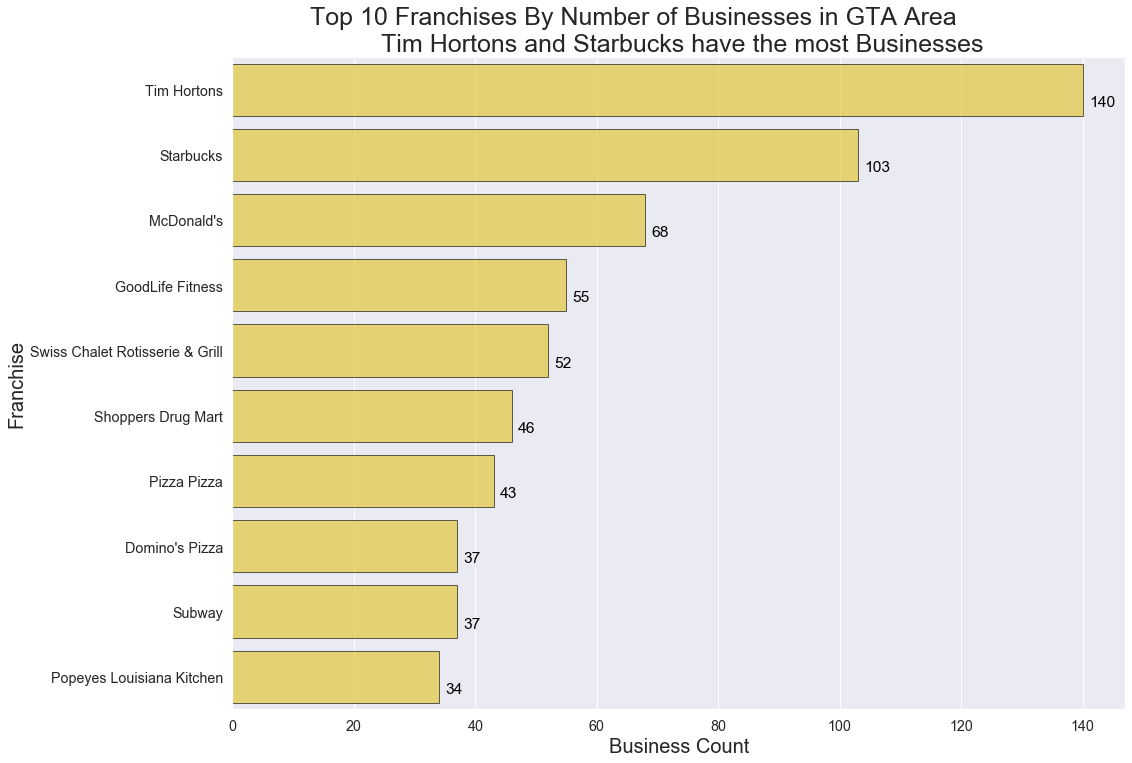

In [86]:
x = gta_franchise_df.name.value_counts()
x = x.sort_values(ascending=False)
x = x.iloc[0:10]
fig, ax = plt.subplots(figsize=(16,12))
ax = sns.barplot(x.values, x.index, alpha=0.6, color="gold", edgecolor="black");
for i, v in enumerate(x.values):
    ax.text(v + 1, i + 0.25, str(v), color='black')
plt.title("Top 10 Franchises By Number of Businesses in GTA Area \
            \n Tim Hortons and Starbucks have the most Businesses",fontsize=25);
plt.ylabel('Franchise', fontsize=20);
plt.xlabel('Business Count', fontsize=20);

In terms of the number of businesses owned by the franchise in GTA, we conclude that Tim Hortons is the toppest franchise, following by Starbucks. This suggest that there exists an intense rivalry between the two franchises. One interesting point observed is that there are no other burger franchise on the barplot other than McDonald's, indicating that McDonald's is far more successful than any other burger franchise in the GTA. Another way to measure brand strength is by the quality of the franchise that the customers think of, that this, the rating of the franchise given by the customers. We will take the top 10 franchise on the graph above and visualize their rating. 

In [87]:
top_10_franchise = gta_franchise_df[gta_franchise_df['name'].isin(list(x.index))]

In [88]:
median_rank = list(top_10_franchise.groupby(['name']).stars.median().sort_values(ascending = False).index)

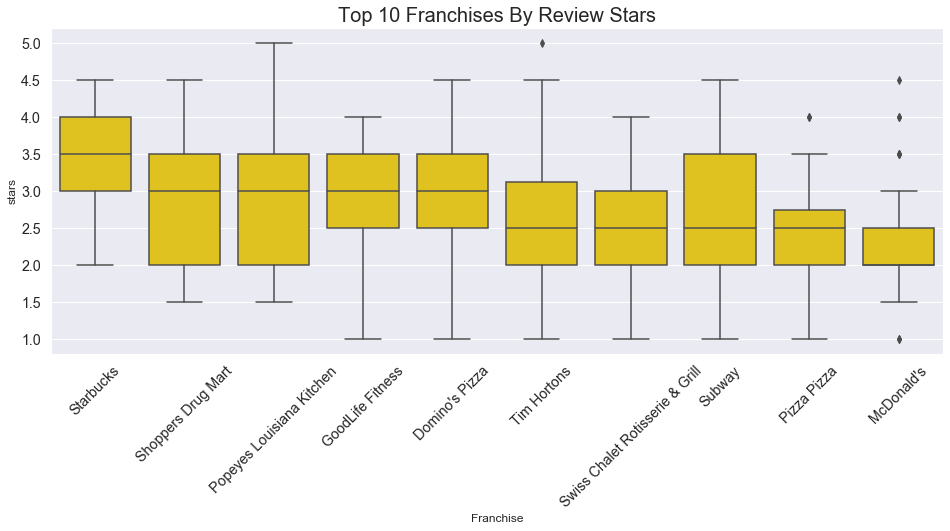

In [89]:
plt.figure(figsize=(16,6))
ax = sns.boxplot(x="name", y="stars", data=top_10_franchise, order = median_rank, color = 'gold')
plt.title("Top 10 Franchises By Review Stars", fontsize = 20)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('stars', fontsize=12)
plt.xlabel('Franchise', fontsize=12);

By comparing the rating of the top 10 franchises originated from the business count, we conclude that Tim Hortons is no longer the top franchise since it has a low rating, with a medium of 2.5. In the previous graph we concluded that McDonald's is far more successful than any other burger franchise in the GTA since it was a lot higher number of businesses. In the boxplots, we can see that McDonald's has the lowest rating. Hence we need a more rigourous investigation on if the McDonald's is the most successful burger franchise. Startbucks earned the highest rating, together with the number of business that Starbucks has, we conclude that Starbucks is the toppest franchise in the city. 

### 4.3. Does business location play an important role in reviews?

For the first part of our exploration to this research question, we will be investigating whether different cities play an important role in reviews. The number of feedback as well as the result of the feedback can be two measurements of "reviews", hence we will be investigating whether cities play an important role in the rating of each business and the sum of the review count of each business. 

One issue we noticed is that there are cities with different name but are actually the same city. For instance, "Scarborough" and "Scarbrough". The dictionary below shows the different name of the city "Scarborough" and its corresponding number of businesses in the city. Similar as when we dealt with different franchise name, we will be using FuzzyWuzzy library. This time we will be using WRatio since matching by partial name is not applicable in this scenario. 

In [90]:
cities = gta_business_df.city.value_counts()
cities_lst = list(cities.index)
matched_cities = []
for c in cities_lst:
    if len(matched_cities) == 0:
        matched_cities.append(c)
    else:
        score = max([fuzz.partial_ratio(c.lower(), matched_c.lower()) for matched_c in matched_cities])
        if score < 80:
            matched_cities.append(c)

In [91]:
for index, value in gta_business_df['city'].iteritems():
    for benchmark in matched_cities:
        score = fuzz.partial_ratio(value.lower(), benchmark.lower())
        if score >= 80:
            gta_business_df.loc[index, 'city'] = benchmark
            break

As we have finished matching up all the cities with different names, we are now ready to investigate our research question. We will first investigate whether cities play an important role in the sum of the review count of each business. 

In [92]:
city_review = gta_business_df.groupby(by = 'city', as_index = False)['review_count'].sum()

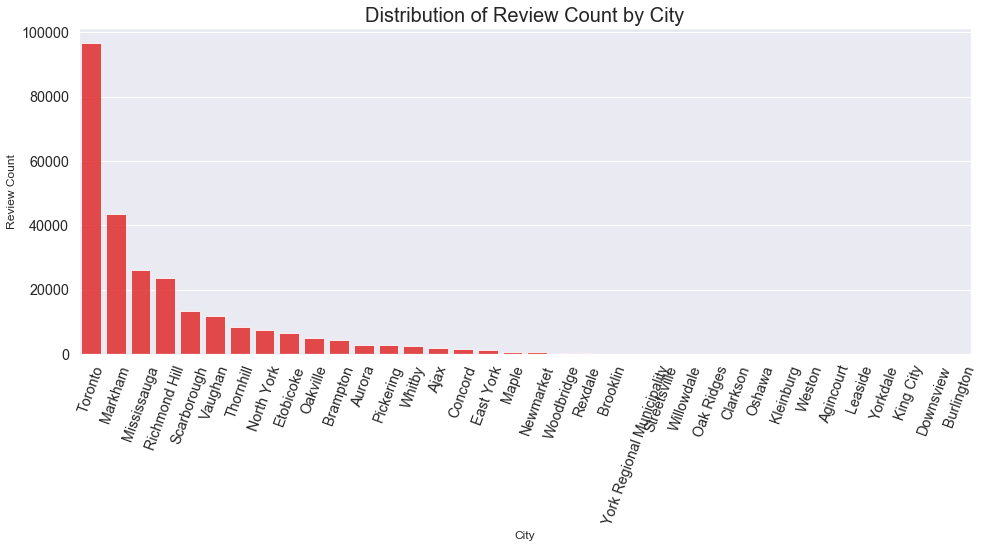

In [93]:
city_review = city_review.sort_values(by = 'review_count', ascending=False)
plt.figure(figsize=(16,6))
ax = sns.barplot(city_review.city, city_review.review_count, alpha=0.8, color = "red")
plt.title("Distribution of Review Count by City", fontsize = 20)
locs, labels = plt.xticks()
plt.setp(labels, rotation=70)
plt.ylabel('Review Count', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.show()

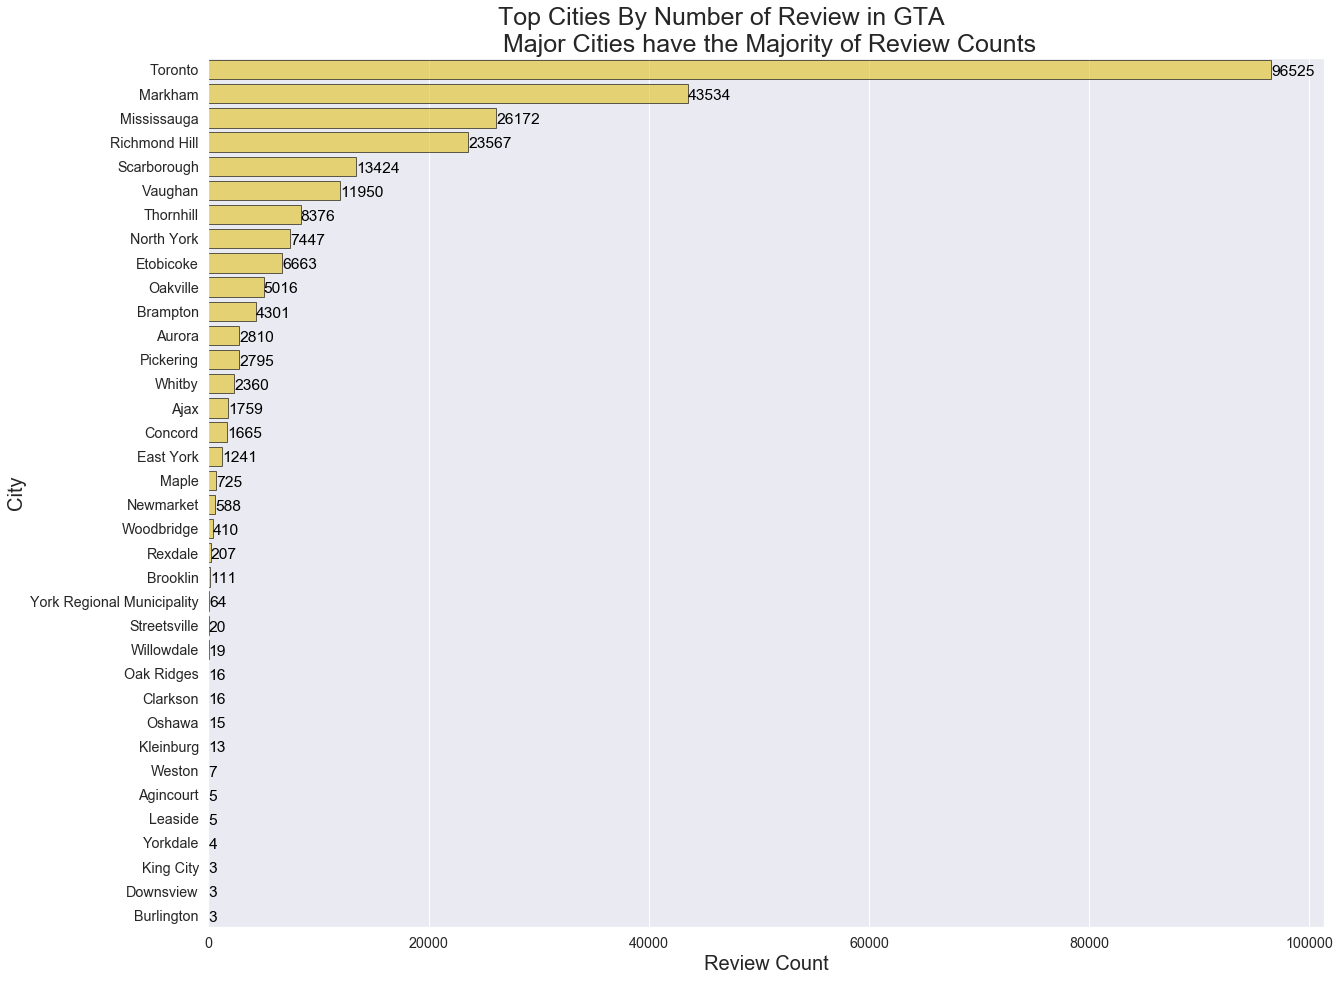

In [94]:
city_review = city_review.sort_values(by = 'review_count', ascending=False)
fig, ax = plt.subplots(figsize=(20,16))
ax = sns.barplot(city_review.review_count, city_review.city, alpha=0.6, color="gold", edgecolor="black");
for i, v in enumerate(city_review.review_count):
    ax.text(v + 20, i + 0.25, str(v), color='black')
plt.title("Top Cities By Number of Review in GTA \
            \n Major Cities have the Majority of Review Counts",fontsize=25);
plt.ylabel('City', fontsize=20);
plt.xlabel('Review Count', fontsize=20);

I obtained the summation of review count in each city and graphed it on the first barplot above. The chart indicates that there is a huge difference of the summation of review count of each city. The major cities such as Toronto, Markham, Mississauga, Richmond Hill, and Scarborough has the majority of review counts. By sum up the review count of the top 5 cities manually, we conclude that out of 35 cities, 5 cities contain 80% of the total review count. However, it is reasonable that there are more businesses in the major cities and hence, more review count. In this case, we are interested in the average review count of each cites. 

In [95]:
city_review_mean = gta_business_df.groupby(by = 'city', as_index = False)['review_count'].mean()

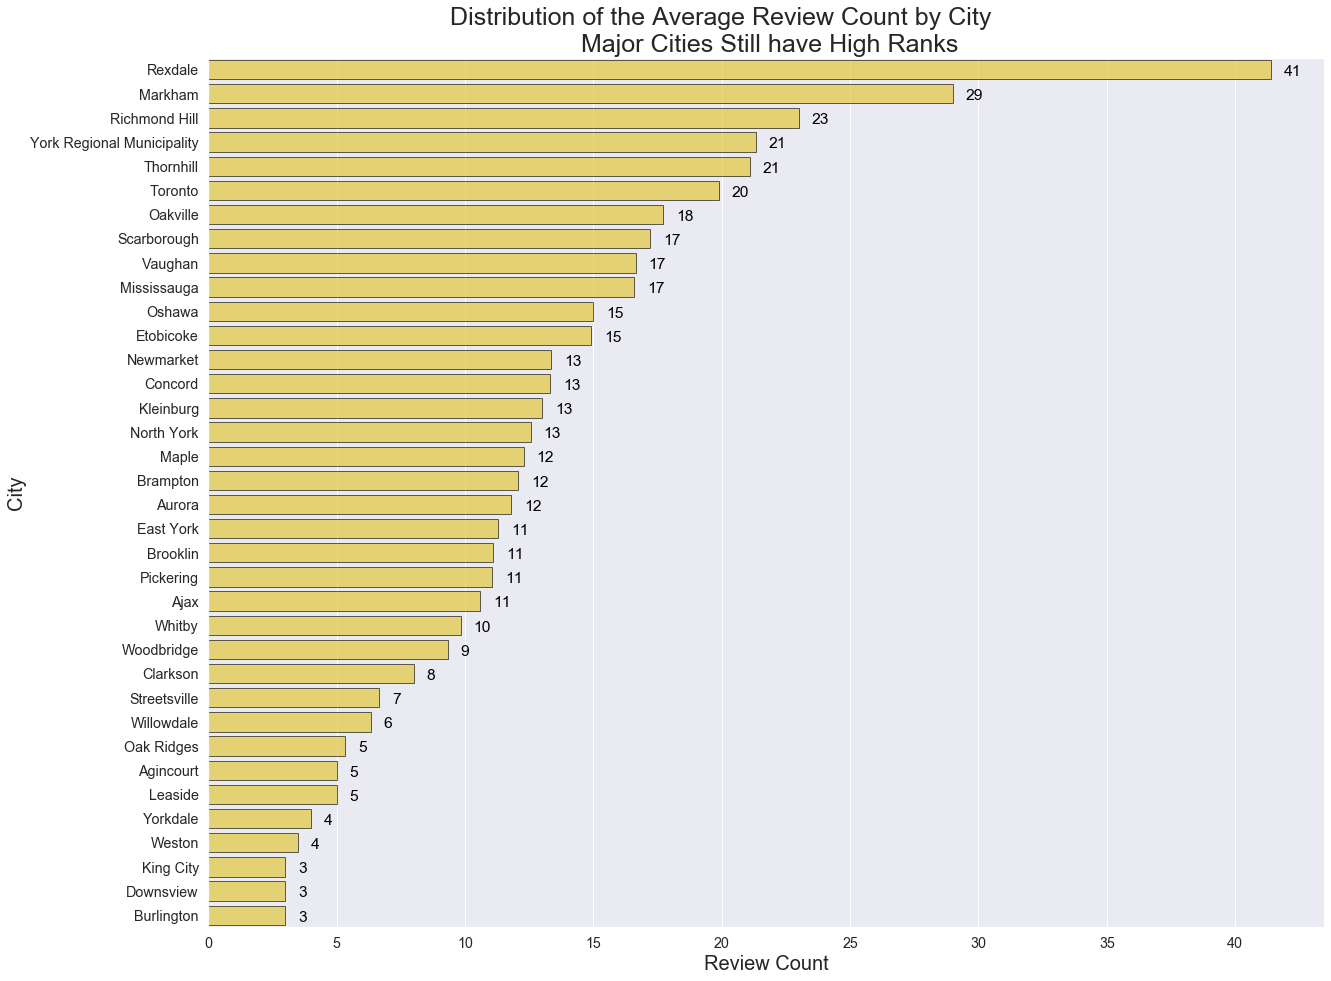

In [96]:
city_review_mean = city_review_mean.sort_values(by = 'review_count', ascending=False)
fig, ax = plt.subplots(figsize=(20,16))
ax = sns.barplot(city_review_mean.review_count, city_review_mean.city, alpha=0.6, color="gold", edgecolor="black");
for i, v in enumerate(city_review_mean.review_count):
    ax.text(v + 0.5, i + 0.25, str(round(v)), color='black')
plt.title("Distribution of the Average Review Count by City \
            \n Major Cities Still have High Ranks",fontsize=25);
plt.ylabel('City', fontsize=20);
plt.xlabel('Review Count', fontsize=20);

The barplot above showcases the average review count for each businesses of each city. The major cities still have a relatively high rank; however, Rexdale becomes the city with the most average review count. Joyce Lau of the South China Morning Post stated in 2015 that in Rexdale "other immigrants live in poverty, surrounded by crime." One possible reason that explain why Rexdale has the highest average review count is that due to the unsafe environment of the city, not a lot of businesses are available in the city and hence, the businesses have more reviews. 

Another way to measure whether business location play an important role in reviews is by investigating the rating distribution of the businesses in the city. We will visualize it with boxplots. I will remove cities that have a number of businesses less than 30, since it is not a large enough sample size to approximate the true rating.

In [97]:
cities = gta_business_df.city.value_counts()
cities = cities[cities >= 30]

In [98]:
valid_cities_rating = gta_business_df[gta_business_df['city'].isin(list(cities.index))]

In [99]:
median_rank = valid_cities_rating.groupby(by ='city',as_index=False)['stars'].median()
median_rank = list(median_rank.sort_values(by = 'stars', ascending = False).city)

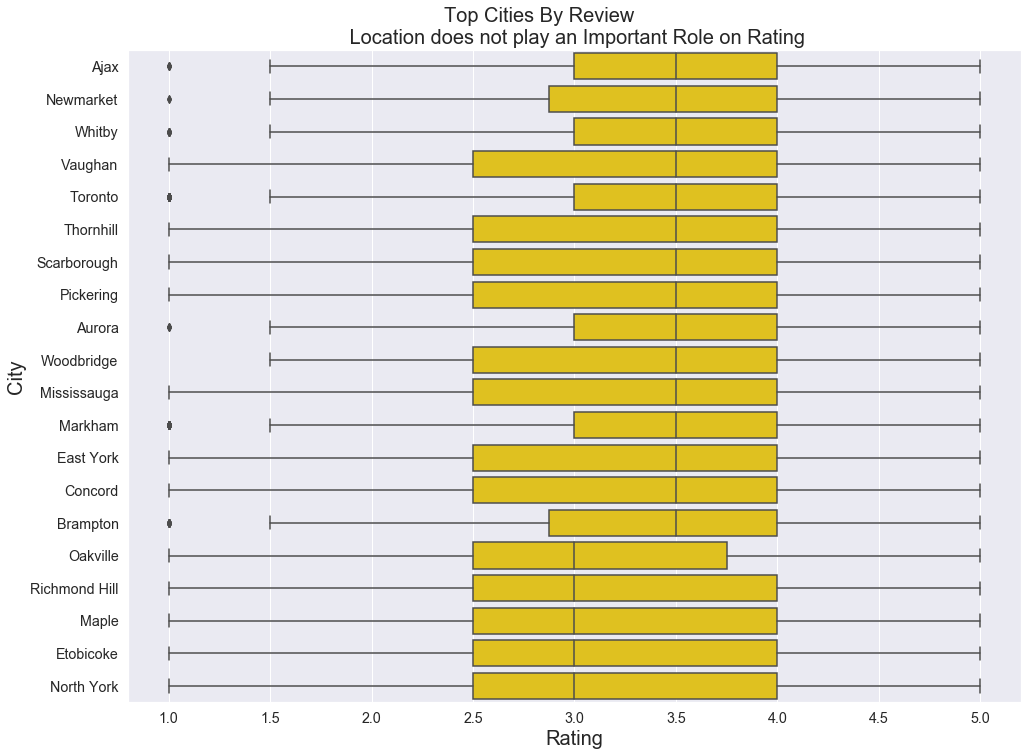

In [100]:
plt.figure(figsize=(16,12))
ax = sns.boxplot(y="city", x="stars", data=valid_cities_rating, order = median_rank, color = 'gold')
plt.title("Top Cities By Review \
            \n Location does not play an Important Role on Rating", fontsize = 20)
plt.setp(labels, rotation=70)
plt.ylabel('City', fontsize=20)
plt.xlabel('Rating', fontsize=20);

Observed from the plot, there is no a huge difference of the central tendency of rating stars among different cities. The medium business rating across different cities are mainly 3.5, and a few cities have a medium business rating of 3.0. The interquartile range of rating stars among different cities are mainly 1.5 or 1, which again suggest that the central tendency of rating stars are not significantly different. Therefore, in terms of the rating of the business, location does not play an important role. 

### 4.4. Is it true that for every Tim Hortons in the GTA there is a Starbucks nearby?

Competition affects the demand of a franchise, hence choosing the location of the store where the demand is not affected by the competitions nearby is important. Tim Hortons and Starbucks are both specializing in coffee items, and hence is a great competition to each other. In the question, we are interested in whether Tim Hortons and Starbucks stores tend to be close in distance or not. 

As we have given the geographic coordinates of each business, we will first calculate distances between establishments of the two groups, by calculating the Vincenty's Formulae of the closest Starbucks to each Tim Hortons, and assess distance patterns.

In [101]:
tim_star_df = gta_franchise_df[gta_franchise_df['name'].isin(['Tim Hortons', 'Starbucks'])]

In [102]:
tim_df = tim_star_df[tim_star_df['name'] == 'Tim Hortons']
star_df = tim_star_df[tim_star_df['name'] == 'Starbucks']

In [103]:
# Calculating Vincenty's distance require the coordinates to be expressed in a tuple (lat, long)
tim_df['location'] = tim_df.apply(lambda row: (row.latitude, row.longitude), axis = 1)
star_df['location'] = star_df.apply(lambda row: (row.latitude, row.longitude), axis = 1)
star_lst = list(star_df['location'])

In [104]:
# Calculate the closest Starbucks to each Tim Hortons
from geopy.distance import vincenty
tim_df['closest_dist'] = tim_df.apply(lambda x: min([vincenty(x.location, s).meters for s in star_lst]), axis = 1)

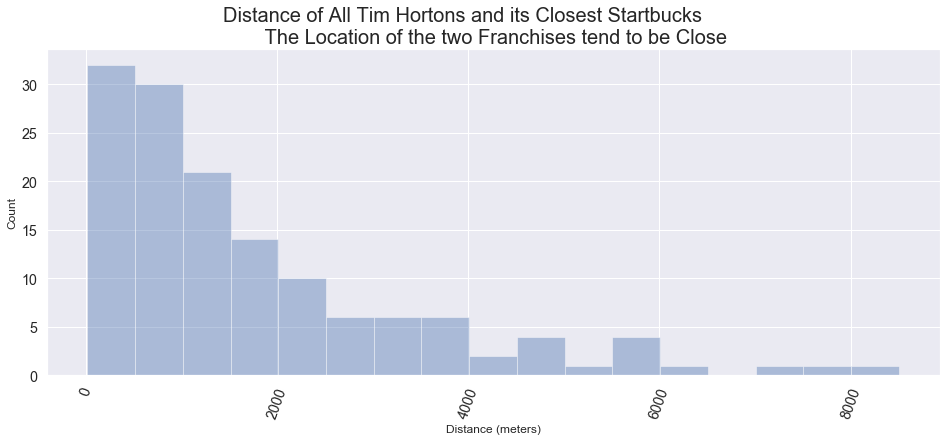

In [105]:
plt.figure(figsize=(16,6))
ax = sns.distplot(tim_df['closest_dist'], kde=False, bins = 17)
plt.title("Distance of All Tim Hortons and its Closest Startbucks \
          \n The Location of the two Franchises tend to be Close", fontsize = 20)
locs, labels = plt.xticks()
plt.setp(labels, rotation=70)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Distance (meters)', fontsize=12);

The bin of the barplot each has a width of 500. Observed that the graph is right-skewed, indicating that the majority Tim Hortons and it closest starbucks tend to be close in ditance, specifically less than 1000 meters. A short distance in location between competitors suggest that the customers tend of have a preference of drinking coffee in Starbucks or Tim Hortons, hence the competition does not have a big impact on the demand. 

The Great Toronto Area can be separated into two parts, the Metropolitan Toronto and the Central Ontario. I want to investigate the distance pattern of the two establishments of the two groups in these two areas separately. A [Statistics Canada](https://www150.statcan.gc.ca/n1/pub/92-195-x/2011001/other-autre/pc-cp/tbl/tbl9-eng.htm) website shows that the postal code of the Metropolitan Toronto starts with a "M" where the Central Ontario starts with a "L". We will separate the GTA area into these two regions accordingly. 

In [106]:
tim_df['Region'] = tim_df.apply(lambda row: row.first_half[0], axis = 1)

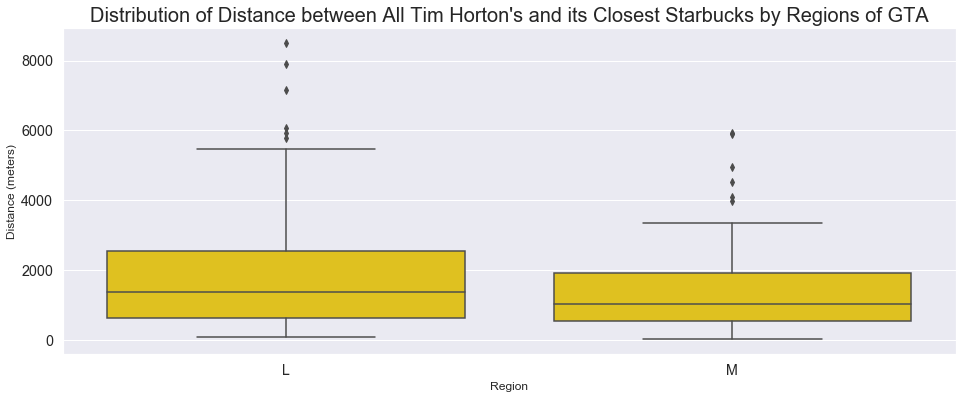

In [107]:
plt.figure(figsize=(16,6))
ax = sns.boxplot(x="Region", y="closest_dist", data=tim_df, color = 'gold')
plt.title("Distribution of Distance between All Tim Horton's and its Closest Starbucks by Regions of GTA", 
          fontsize = 20)
plt.ylabel('Distance (meters)', fontsize=12)
plt.xlabel('Region', fontsize=12);

The boxplot indicates that despite the the two regions of GTA have a similar Q1 and medium of the distance between Tim Horton's and its closest Starbucks, the Central Ontario Region has a higher interquartile range than the Metropolitan Toronto. This is expected since the Metropolitan Toronto is more condensed in terms of its population and commercial.

We will also visualize the location two franchises on a map to have a more concrete sense of how close to two franchises are. 

In [108]:
import folium
# lat and lon provides the geographic coordinate of Toronto
lat = 43.7325747
lon = -79.4192676
gta_map = folium.Map(location=[lat, lon],
                        tiles = "Stamen Terrain",
                        zoom_start = 10)

In [109]:
# Mark all the Tim Hortons in GTA on the map
for index, row in tim_df.iterrows():
    folium.Marker([row.latitude, row.longitude],
              popup='Tim Hortons',
              icon=folium.Icon(color='green')
             ).add_to(gta_map)

In [110]:
# Mark all the Startbucks in GTA on the map
for index, row in star_df.iterrows():
    folium.Marker([row.latitude, row.longitude],
              popup= 'Starbucks',
              icon=folium.Icon(color='red')
             ).add_to(gta_map)

In [8]:
# # Use html to provide text on the labels 
# item_txt = """
#             <br> &nbsp; Tim Hortons &nbsp; <i class="fa fa-map-marker fa-2x" style="color:green"></i><br>
#             <br> &nbsp; Starbucks &nbsp; <i class="fa fa-map-marker fa-2x" style="color:red"></i>

#             """

# # Add a legend
# legend_html = """
#      <div style="
#      position: fixed;
#      bottom: 50px; right: 50px; width: 200px; height: 160px; 
#      border:2px solid grey; z-index:9999; 

#      background-color:white;
#      opacity: 1.2;

#      font-size:14px;
#      font-weight: bold;

#      ">
#      &nbsp; {title} 

#      {itm_txt}

#       </div> """.format( title = "Legend", itm_txt= item_txt)
# gta_map.get_root().html.add_child(folium.Element( legend_html ));
# gta_map

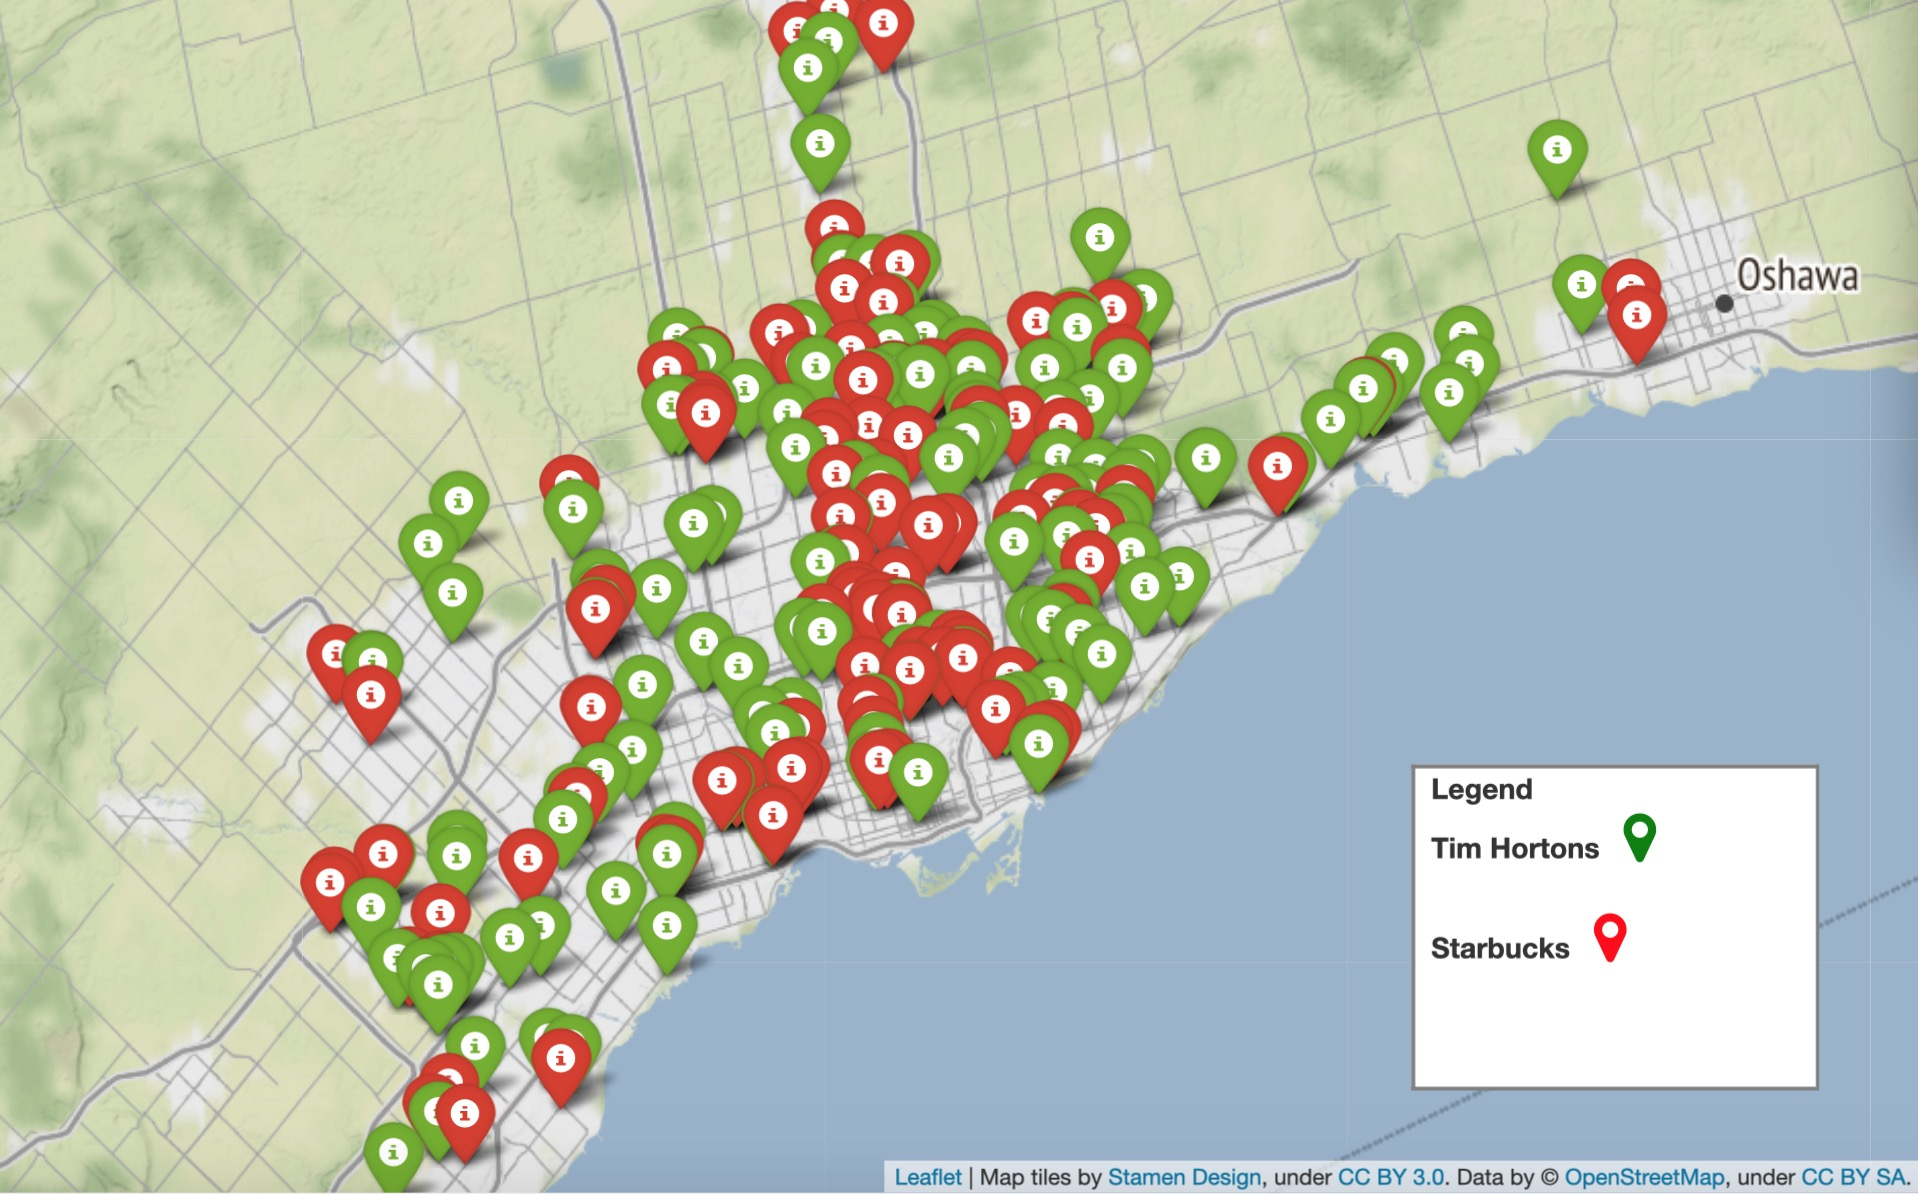

In [7]:
from IPython.display import Image
Image(filename='Map4.jpeg')

Tim Hortons in GTA are represented by the green markers on the map, while Starbucks are represented by the red markers. Few observations made on the map:
1. Starbucks are more concentrated on the central part of GTA, specifically on the Yonge Street and Bay Street. 
2. There are more Starbucks than Tim Hortons in the Metropolitan area, while other regions have more Tim Hortons than Starbucks.


<br/> <br/>

***

##  V. Reviews for GTA Businesses

In this section, we will be working with the "review" dataset and we will be exploring the reviews made for the GTA businesses. The research questions we are interested in are:

1. Is there a small group of users responsible for most reviews?
2. Do Yelp reviewers use similar language in their reviews of GTA's Tim Horton's and Starbucks? What about for the subset of users who reviewed both establishments?
3. Can we automatically detect "paid reviewers" (i.e. people who are paid to write positive reviews)?

In [113]:
gta_business_lst = list(gta_business_df.business_id)
gta_review = yelp_review[yelp_review['business_id'].isin(gta_business_lst)]

### 5.1. Is there a small group of users responsible for most reviews?

The Yelp Elite Squad is a diverse community of passoinate writes that share their experiences about business products on Yelp. They generate well-written reviews, high quality tips, and is adventurous with various business products. In this question, we are interested in if there is a small group of users responsible for most reviews, as the users are tend to be the Yelp Elite Squad. 

As a part of data exploration, We will first obtain the number of reviews that each user made and visualize it. 

In [114]:
user_agg = gta_review.groupby('user_id').agg({'review_id':['count'],
                                'useful':['sum'],'funny':['sum'],'cool':['sum'],
                               'stars':['median']}).sort_values([('review_id','count')],ascending=False)

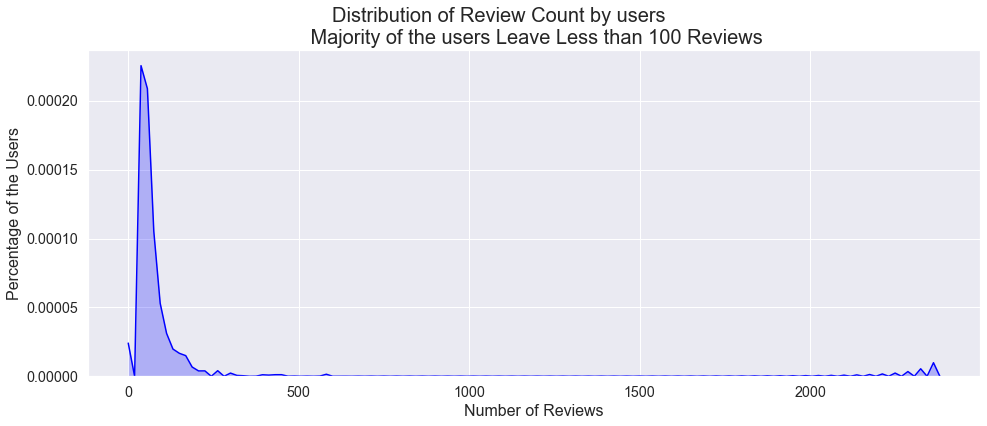

In [119]:
plt.figure(figsize=(16,6))
ax=sns.kdeplot(user_agg[('review_id','count')],shade=True,color='blue', legend = False)
plt.title("Distribution of Review Count by users \
            \n Majority of the users Leave Less than 100 Reviews",fontsize= 20)
plt.xlabel('Number of Reviews', fontsize=16)
plt.ylabel('Percentage of the Users', fontsize=16);

The line plot above is right skewed with a very long tail, meaning that users tend to leave less reviews and there is a small proportion of the users leave significantly high number of reviews. This suggest that to some extend, there is a small proportion of users that is responsible for most of the reviews on Yelp. 

To have a better visualization, I want to cap the maximum reviews to the 99.7 percentile, hence the tail will not be as long. Moreover, I also want to visualize the cumulative percentage of the number of users by review count

In [120]:
explore_df = user_agg.copy()
cap = user_agg[('review_id','count')].quantile(0.997)
explore_df[('review_id','count')].loc[explore_df[('review_id','count')] > cap] = cap

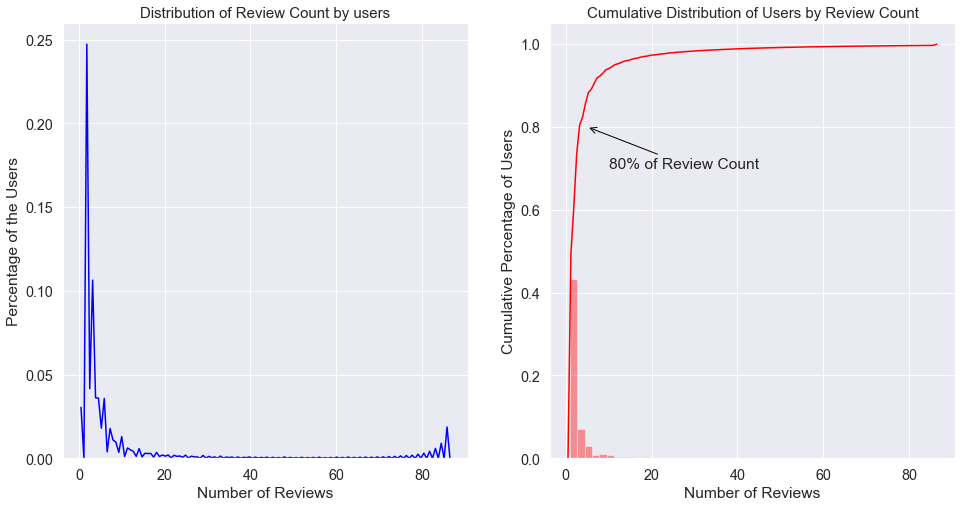

In [122]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
sns.kdeplot(explore_df[('review_id','count')], color='blue', legend = False, ax = axes[0])
axes[0].set(title = "Distribution of Review Count by users", 
            ylabel = 'Percentage of the Users', 
            xlabel = 'Number of Reviews')
axes[0].title.set_fontsize(15)

#Cumulative Distribution
sns.distplot(explore_df[('review_id','count')],
             kde_kws=dict(cumulative=True), color = 'red', ax = axes[1])
axes[1].set(title = "Cumulative Distribution of Users by Review Count", 
            ylabel = 'Cumulative Percentage of Users', 
            xlabel = 'Number of Reviews')
axes[1].title.set_fontsize(15)
axes[1].annotate('80% of Review Count', xy=(5, 0.8), xytext=(10, 0.7),
            arrowprops=dict(arrowstyle="->", facecolor='black', color = 'black'))
plt.show()

From the cumulative distribution of users by review count, we see that approximately 80% of the users commented less than 5 reviews, and approximately 90% of the users commented less than 10 reviews. This further support the fact that we should expect there is a small proportion of users that are responsible for most reviews. 

In [123]:
user_agg = user_agg.sort_values(by = ('review_id', 'count'), ascending = True)
user_agg['review_cum_sum'] = user_agg[('review_id', 'count')].cumsum()

In [124]:
user_agg = user_agg.reset_index()
user_agg.index = user_agg.index + 1

In [125]:
user_agg['review_cum_percentile'] = user_agg['review_cum_sum'] / 270652
user_agg['user_count_percentile'] = user_agg.index / max(user_agg.index)

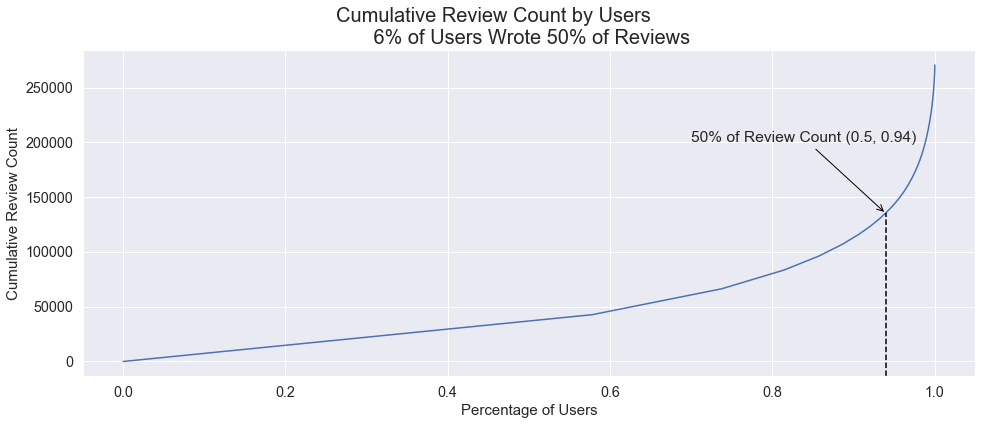

In [129]:
plt.figure(figsize=(16,6))
ax = sns.lineplot(x = 'user_count_percentile', y = 'review_cum_sum', data = user_agg)
ax.annotate('50% of Review Count (0.5, 0.94)', xy=(0.939336, 135333), xytext=(0.70, 200000),
            arrowprops=dict(arrowstyle="->", facecolor='black', color = 'black'))
plt.axvline(x=0.939336, ymax = 0.5, color = 'black', ls = '--')
plt.title('Cumulative Review Count by Users \
            \n 6% of Users Wrote 50% of Reviews',fontsize=20)
plt.xlabel('Percentage of Users', fontsize=15)
plt.ylabel('Cumulative Review Count', fontsize=15);

On the line plot above, I have sorted the the review count of each users and plotted the cumulative review count by the percentage of users. We observed that 50% of the review count are written by 6% of the users, suggesting that there is a small group of users responsible for most of the reviews. 

### 5.2. Do Yelp reviewers use similar language in their reviews of GTA's Tim Horton's and Starbucks?

In the research question, we will be performing text analysis on the reviews of GTA's Tim Horton's and Starbucks. I am specifically interested in: 
1. What do customers that leave negative review comment about the two franchises?
2. What do customers that leave positive review comment abou the two franchises?

We will first explore how is the quality of the franchises different i.e. the rating stars of the franchises.

In [146]:
from textblob import TextBlob
from wordcloud import WordCloud
import re, string
import nltk
from nltk.corpus import stopwords

In [179]:
tim_star_df = gta_franchise_df[gta_franchise_df['name'].isin(['Tim Hortons', 'Starbucks'])]
tim_lst = list(gta_franchise_df[gta_franchise_df['name'] == 'Tim Hortons'].business_id)

In [131]:
tim_star_gta_review = gta_review[gta_review['business_id'].isin(list(tim_star_df.business_id))]

In [132]:
tim_star_gta_review['franchise'] = tim_star_gta_review.apply(lambda row: "Tim Hortons" 
                                                             if row.business_id in tim_lst else "Starbucks",
                                                            axis = 1)

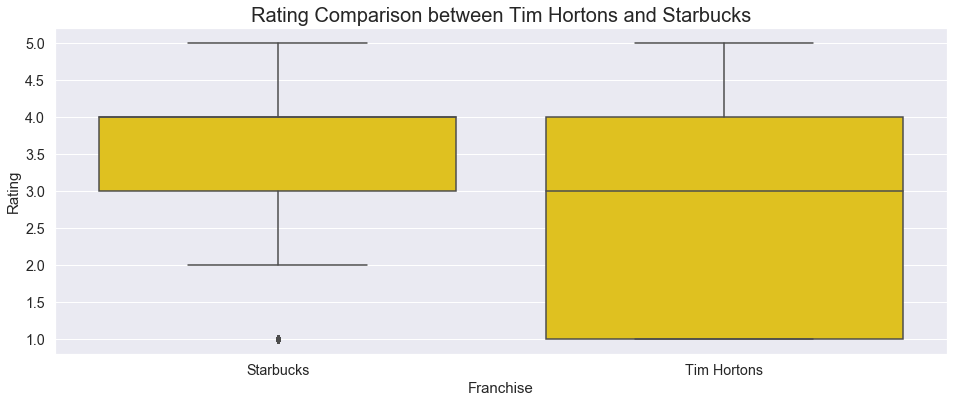

In [134]:
plt.figure(figsize=(16,6))
ax = sns.boxplot(x="franchise", y="stars", data=tim_star_gta_review, color = 'gold')
plt.title("Rating Comparison between Tim Hortons and Starbucks", fontsize = 20)
plt.setp(labels, rotation=70)
plt.ylabel('Rating', fontsize=15)
plt.xlabel('Franchise', fontsize=15);

The boxplots indicate that Starbucks generally have higher review than Tim Hortons, and is more consistent in their quality as it has a smaller IQR. Hence, we should expect more negative comments from Tim Hortons than Starbucks

We will also explore whether people are leaving meaningful reviews. We will explore this by constructing histograms based on the star rating and review length for both of the franchises.  

In [135]:
tim_star_gta_review['length'] = tim_star_gta_review['text'].apply(len)
tim_review = tim_star_gta_review[tim_star_gta_review.franchise == "Tim Hortons"]
star_review = tim_star_gta_review[tim_star_gta_review.franchise == "Starbucks"]

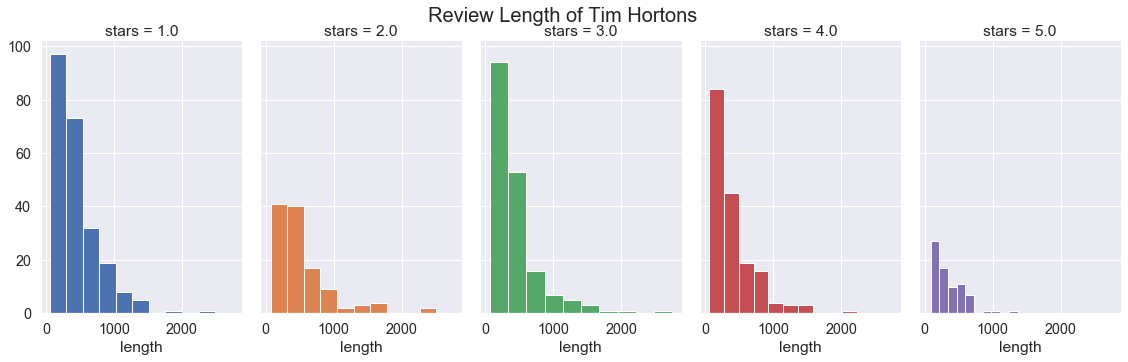

In [140]:
g = sns.FacetGrid(tim_review, col='stars', hue = 'stars')
g.map(plt.hist,'length')
plt.subplots_adjust(top=0.9)
g.fig.set_size_inches(16, 6)
g.fig.suptitle("Review Length of Tim Hortons", size=20);

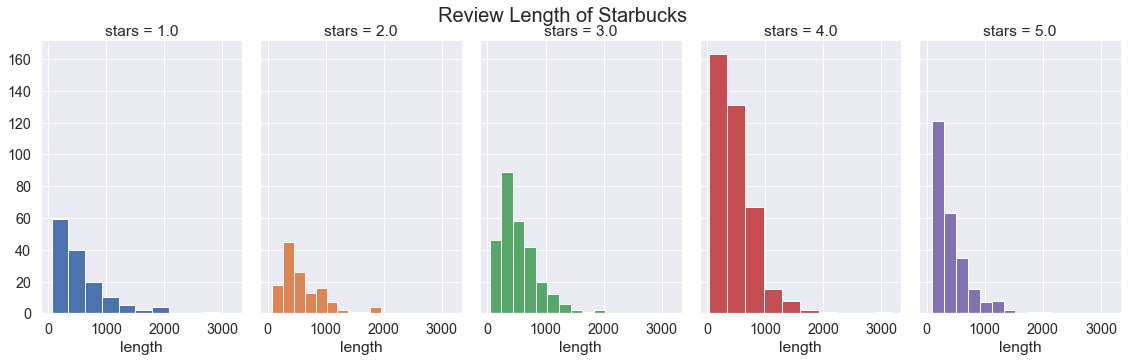

In [137]:
g = sns.FacetGrid(star_review, col='stars', hue = 'stars')
g.map(plt.hist,'length')
plt.subplots_adjust(top=0.9)
g.fig.set_size_inches(16, 6)
g.fig.suptitle("Review Length of Starbucks", size=20);

Comparing the review length of the two franchises, we can see that reviews for Tim Hortons are generally shorter in length for the rating larger than 4. However, we can see that there are a lot more lengthly reviews for the lower rating starts for Tim Hortons than Starbucks. We can also see that for Starbucks, people tend leave shorter reviews for 4 and 5 rating stars. 

As we have a brief overview of the review text for both Tim Hortons and Starbucks, we will now perform text analysis for review by using Natural Language Processing. A lot of my code is adapted from the github [post](https://gist.github.com/benhoyt/dfafeab26d7c02a52ed17b6229f0cb52), which prints most frequent N-grams in given file. We will analyze what are the customers' comment about the two franchises.

In [198]:
# Code is adapted from the github post mentioned above
import collections
def tokenize(string):
    """Convert string to lowercase and split into words (ignoring
    punctuation), returning list of words.
    """
    return re.findall(r'\w+', string.lower())


def count_ngrams(lines, min_length=2, max_length=4):
    """Iterate through given lines iterator (file object or list of
    lines) and return n-gram frequencies. The return value is a dict
    mapping the length of the n-gram to a collections.Counter
    object of n-gram tuple and number of times that n-gram occurred.
    Returned dict includes n-grams of length min_length to max_length.
    """
    lengths = range(min_length, max_length + 1)
    ngrams = {length: collections.Counter() for length in lengths}
    queue = collections.deque(maxlen=max_length)

    # Helper function to add n-grams at start of current queue to dict
    def add_queue():
        current = tuple(queue)
        for length in lengths:
            if len(current) >= length:
                ngrams[length][current[:length]] += 1

    # Loop through all lines and words and add n-grams to dict
    for line in lines:
        for word in tokenize(line):
            queue.append(word)
            if len(queue) >= max_length:
                add_queue()

    # Make sure we get the n-grams at the tail end of the queue
    while len(queue) > min_length:
        queue.popleft()
        add_queue()

    return ngrams


def print_most_frequent(ngrams, num=10):
    """Print num most common n-grams of each length in n-grams dict."""
    for n in sorted(ngrams):
        if n > 2:
            print('----- {} most common {}-grams -----'.format(num, n))
            for gram, count in ngrams[n].most_common(num):
                print('{0}: {1}'.format(' '.join(gram), count))
            print('')

I have separated the reviews into negative and positive reviews based on the rating stars. I categorize negative reviews as 1 and 2 stars and positive as 4 and 5 stars. This will help us answer the research questions we are interested in.

In [186]:
bad_review = tim_star_gta_review[tim_star_gta_review['stars'] <= 2.0]
good_review = tim_star_gta_review[tim_star_gta_review['stars'] >= 4.0]

In [187]:
tim_bad_review = bad_review[bad_review['franchise'] == "Tim Hortons"]
star_bad_review = bad_review[bad_review['franchise'] == "Starbucks"]

In [193]:
tim_good_review = good_review[good_review['franchise'] == "Tim Hortons"]
star_good_review = good_review[good_review['franchise'] == "Starbucks"]

##### Tim Hortons Negative Comment Text Analysis

In [191]:
tim_most_frequent_badreviews = count_ngrams(tim_bad_review.text,max_length=5)
print_most_frequent(tim_most_frequent_badreviews, num= 10)

----- 10 most common 4-grams -----
i don t know: 16
this tim horton s: 11
the worst tim hortons: 10
i asked for a: 10
at the drive thru: 9
i ve ever been: 8
to this tim hortons: 8
is the worst tim: 8
this tim hortons is: 7
go to this tim: 7

----- 10 most common 5-grams -----
is the worst tim hortons: 7
i ve ever been to: 6
go to this tim hortons: 6
i don t know if: 6
this is the worst tim: 6
this is one of the: 5
out of my way to: 5
i don t think i: 5
have to repeat my order: 4
the worst tim hortons i: 4



I have displayed the comments for the most frequent 4-grams and 5-grams, where n-grams means contiguous sequences of n-items in a sentence. The output helps us understand why customers leaves a bad review for Tim Hortons. Phrases such as "i asked for a", "out of my way to", "have to repeat my order" tells us that consumers are not satisfied with the customer service of Tim Hortons. Also note that the phrase "at the drive thru" tells us that consumers are also not satisfied with the drive thru service provided by the franchise. 

##### Starbucks Negative Comment Text Analysis

In [199]:
star_most_frequent_badreviews = count_ngrams(star_bad_review.text,max_length=4)
print_most_frequent(star_most_frequent_badreviews, num= 10)

----- 10 most common 3-grams -----
i don t: 25
one of the: 24
at this location: 19
i ve been: 18
i ordered a: 17
to this location: 17
i didn t: 15
i m not: 15
i asked for: 15
they don t: 14

----- 10 most common 4-grams -----
in front of me: 9
i ve been to: 8
is one of the: 7
i don t think: 7
this is one of: 5
don t think i: 5
starbucks i ve ever: 5
i asked for a: 5
at the end of: 5
the end of the: 5



I have displayed the comments for the most frequent 3-grams and 4-grams. I chose not to display the most frequent 5-grams because it is lack in compelling insights by trial and error. The output helps us understand why customers leaves a bad review for Starbucks. Phrases such as "i ordered a", "i asked for", also tells us that consumers are not satisfied with the customer service of Starbucks when leaving a bad review.

##### Tim Hortons Positve Comment Text Analysis

In [201]:
tim_most_frequent_goodreviews = count_ngrams(tim_good_review.text,max_length=4)
print_most_frequent(tim_most_frequent_goodreviews, num = 10)

----- 10 most common 3-grams -----
tim horton s: 39
one of the: 20
it s a: 20
the drive thru: 18
the service is: 17
this location is: 15
i don t: 15
at this location: 13
a lot of: 11
the staff are: 11

----- 10 most common 4-grams -----
this tim horton s: 9
is one of the: 7
tim horton s is: 6
have a drive thru: 5
here in the morning: 5
and the service is: 5
clean and the staff: 5
i ve never had: 5
one of the best: 5
staff is friendly and: 5



I have displayed the comments for the most frequent 3-grams and 4-grams. I chose not to display the most frequent 5-grams because it is lack in compelling insights by trial and error. The output helps us understand why customers leaves a good review for Tim Hortons. Phrases such as "the staff are", "and the service is", "clean and the staff" tells us that consumers are satisfied with the customer services as well as the clean environment of the business.

##### Starbucks Positve Comment Text Analysis

In [202]:
star_most_frequent_goodreviews = count_ngrams(star_good_review.text,max_length=4)
print_most_frequent(star_most_frequent_goodreviews, num= 10)

----- 10 most common 3-grams -----
this location is: 60
a lot of: 54
it s a: 54
the staff are: 52
one of the: 46
i don t: 45
in the area: 42
at this location: 40
this is my: 31
this is a: 30

----- 10 most common 4-grams -----
is one of the: 14
the staff here are: 13
i ve been to: 13
get some work done: 13
a nice place to: 12
this is one of: 11
a great place to: 11
is my go to: 10
to get some work: 10
the only downside is: 9



I have displayed the comments for the most frequent 3-grams and 4-grams. I chose not to display the most frequent 5-grams because it is lack in compelling insights by trial and error. The output helps us understand why customers leaves a good review for Starbucks. Phrases such as "the staff are", "the staff here are", tells us that consumers are impressed with the customer services when giving a positive comment. Phrases such as "in the area", "a great place to", "to get some work" suggests that consumers are impressed with the clean, productive environment that Starbucks has. An interesting phrase observed is "the only downside is", this suggest that consumers are leaving constructive criticism for the business to improve. 

To conclude, Yelp reviewers tend use similar language in their negative reviews of GTA's Tim Horton's and Starbucks, as they are mostly unsatisfied with the customer service. For positive reviews, consumers tend to be impressed with the customer service of both Tim Hortons and Starbuck, and is also impressed by the clean, productive environment of Starbucks. This also suggest that the two franchise should focus on improving their customer services as well as their environment if they are looking for ways to improve their business quality.

### 5.3 Can we automatically detect "paid reviewers" (i.e. people who are paid to write positive reviews)?

Increasing amount of customer experience feedbacks on the consumer review websites benefits the society in various ways. Many businesses have proposed data mining solutions to improve their products based on the customers' reviews. Reviews give other customers insights about the quality of the products. However, [current research](https://fortune.com/2013/09/26/yelps-fake-review-problem/) has found that a proportion of reviews on Yelp are not reliable. Reviews are written by the "paid reviewers". Untruthful reviews influences other consumers' opinions as well as businesses' marketing decisions. 

Our data does not have an attribute telling us about whether the review is deceptive or true. Therefore, we are not able to rigorously build a model or perform statistical analysis. However, we will discuss possible characteristics of fake reviews, and provide possible solution to detect "paid reviewers". 

Possible characteristics of fake reviews: 
1. Posted a positive review for a business without given an objective experience of the products, and have given a significantly higher rating than average rating stars of the business. 
2. Paid reviews tend to leave longer length in text.
3. There should be some specfic word choice, tone, as well as sentiment of the paid review texts.

If given data that has an attribute telling us about whether the review is deceptive or true, I will construct a LightGBM model aiming to optimize the AUC score for the detection of fake reviews. LightGBM is a gradient boosting framework that uses tree based algorithm and is efficent for classification. Besides parameter tuning, as we have discussed about the possible characteristics of fake reviews, the features I will be using the train the model are:
1. Length of the review
2. Word choices, excluding stop words, punctuations and remove noises from the data. Normalization is also needed. 
3. Percentages of positive and negative words, calculated using NLP.
4. Standard deviation to the other reviews made to the business

Hopefully, our theoretical model will successfully filter out fake reviews and allow Yelp to serve its purpose.

<br/> <br/>

***

##  VI. Conclusion

To summarize our findings, with the Yelp dataset, we have investigated on businesses that have been reviewed on Yelp. We have found that this dataset encompasses cities in the North American and the cities are mainly surrounded at the Metropolitan areas. Food related categories, shopping related categories, and service related categories are the most popular categories on Yelp. We further investigated which business categories tend to have bike parkings. By perform chi-square hypothesis testing, we have proven that bike parking is dependent on category, and we found leisure related categories tend to have bike parkings. Moreoever, we have also shown that there is a positive relationship between the rating of the business and the number of reviews of the business. 

The second part of our research, we investigated the dataset specifically for the GTA area. We found that leisure related businesses still tend to be popular, following by service related businesses. An interesting fact we found is that GTA has a diverse food culture, instead of focusing on a specific cuisine. We further recognized that Starbucks is the strongest franchise in GTA in terms of it number of business as well as the quality of the business. We have also found that the majority of the Tim Hortons and Starbucks are close in distance, specifically less than 1000 meters. 

The final part of our research, we investigated the review made to businesses in GTA. We found that there is a small group of users responsible for most of the reviews made on Yelp. By comparing the review made on the two leading franchises, Starbucks and Tim Hortons, we found that the businesses with low rating should improve their customer services, and Starbucks should maintain their clean and productive environment. In the end, we theoretically constructed a LightGBM model for paid review detections, for the goal to help Yelp serve its purposes.

In the end of this research, I would like to recognize some of the limitations in this study. In the Yelp data, there are inconsistent state, city, and business names. We have used fuzzywuzzy to deal with this issue; however, there are names that cannot be matched. Another limitation I would like to mention is the error in the geographic coordinates. There are several businesses that have wrong geographical coordinates. Finally, as we are not able to detect paid reviews, some findings obtained when investigating the review data might be inaccurate. 

It could be worthwhile to further dive into the relationship between rating stars of the business and the demand of the business, to further showcases that higher number of reviews leads to higher rating, which increases demand and hence increases the profit. It could also be worthwhile to obtain fake reviews data and construct the LightGBM model accordingly. 